In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

# Data overview

In [ ]:
train_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45813960.0,549.0,891,MERCEDES-BENZ,CLA 250,2021,Sedan,Yes,Petrol,2,718400 km,4,Automatic,Front,4-May,Left wheel,White,12.0
1,45730073.0,41281.0,730,SSANGYONG,Actyon,1987,Jeep,Yes,Diesel,1.6,10573 km,4,Automatic,Front,4-May,Left wheel,Blue,4.0
2,45787895.0,15681.0,-,MERCEDES-BENZ,ML 350,2008,Jeep,Yes,LPG,3.5,386300 km,6,Tiptronic,4x4,4-May,Left wheel,Silver,12.0
3,45731438.0,36899.0,777,HYUNDAI,H1,1990,Minivan,Yes,Diesel,2.5,15200 km,4,Automatic,Front,4-May,Left wheel,Silver,4.0
4,45797083.0,15289.0,836,HYUNDAI,Genesis,2007,Coupe,Yes,Petrol,2,476100 km,4,Automatic,Front,4-May,Left wheel,Red,4.0


In [ ]:
test_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45732367.0,89482.0,1176,HYUNDAI,Santa FE,2019,Jeep,Yes,Diesel,2.2,69852 km,4,Automatic,Front,4-May,Left wheel,Grey,4.0
1,45762577.0,4234.0,753,HYUNDAI,Sonata,2018,Sedan,Yes,Hybrid,2.4,659325 km,4,Automatic,Front,4-May,Left wheel,Black,0.0
2,45776011.0,21012.0,-,TOYOTA,Prius,2003,Hatchback,Yes,Petrol,1.8,238600 km,4,Variator,Front,4-May,Left wheel,Silver,6.0
3,45761052.0,4704.0,-,MERCEDES-BENZ,NaN,2019,Sedan,No,Petrol,2,644900 km,4,Manual,Front,4-May,Left wheel,Red,4.0
4,45619251.0,188.0,1053,MERCEDES-BENZ,E 350,2022,Sedan,Yes,Diesel,3.5,695000 km,6,Automatic,4x4,4-May,Left wheel,Silver,12.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                14811 non-null  float64
 1   Price             14833 non-null  float64
 2   Levy              14850 non-null  object 
 3   Manufacturer      14849 non-null  object 
 4   Model             14815 non-null  object 
 5   Prod. year        14900 non-null  object 
 6   Category          14819 non-null  object 
 7   Leather interior  14866 non-null  object 
 8   Fuel type         14845 non-null  object 
 9   Engine volume     14810 non-null  object 
 10  Mileage           14830 non-null  object 
 11  Cylinders         14815 non-null  object 
 12  Gear box type     14831 non-null  object 
 13  Drive wheels      14820 non-null  object 
 14  Doors             14830 non-null  object 
 15  Wheel             14834 non-null  object 
 16  Color             14840 non-null  object

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3708 non-null   float64
 1   Price             3705 non-null   float64
 2   Levy              3719 non-null   object 
 3   Manufacturer      3712 non-null   object 
 4   Model             3701 non-null   object 
 5   Prod. year        3725 non-null   object 
 6   Category          3710 non-null   object 
 7   Leather interior  3717 non-null   object 
 8   Fuel type         3709 non-null   object 
 9   Engine volume     3705 non-null   object 
 10  Mileage           3704 non-null   object 
 11  Cylinders         3711 non-null   object 
 12  Gear box type     3710 non-null   object 
 13  Drive wheels      3701 non-null   object 
 14  Doors             3710 non-null   object 
 15  Wheel             3694 non-null   object 
 16  Color             3714 non-null   object 


In [ ]:
train_data.describe()

,ID,Price,Airbags
count,1.481100e+04,1.483300e+04,14783.000000
mean,4.556776e+07,1.825421e+04,6.611649
std,9.580107e+05,2.166557e+05,4.312601
min,2.074688e+07,1.000000e+00,0.000000
25%,4.569407e+07,5.331000e+03,4.000000
50%,4.577244e+07,1.286100e+04,6.000000
75%,4.580178e+07,2.139500e+04,12.000000
max,4.581665e+07,2.630750e+07,16.000000


In [ ]:
test_data.describe()

,ID,Price,Airbags
count,3.708000e+03,3705.000000,3702.000000
mean,4.559206e+07,16238.367072,6.599406
std,9.188313e+05,21173.392255,4.283487
min,2.436776e+07,1.000000,0.000000
25%,4.571272e+07,5331.000000,4.000000
50%,4.577286e+07,12701.000000,6.000000
75%,4.580213e+07,21639.000000,12.000000
max,4.581665e+07,872946.000000,16.000000


In [ ]:
train_data.shape

(14911, 18)

<Axes: xlabel='Price', ylabel='Count'>

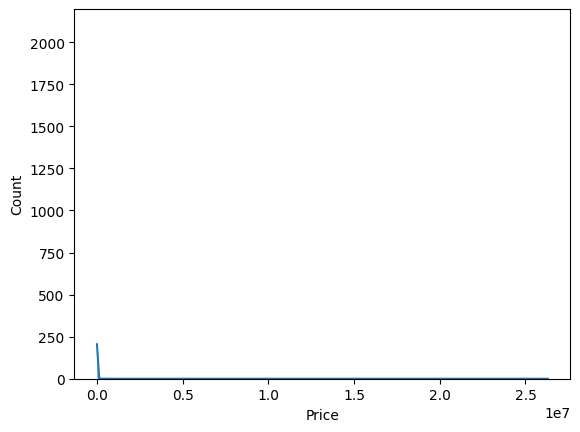

In [ ]:
sns.histplot(data=train_data, x='Price', kde=True)
#data is right skewed

In [ ]:
test_data.shape

(3728, 18)

In [ ]:
print(train_data.isnull().sum())

ID                  100
Price                78
Levy                 61
Manufacturer         62
Model                96
Prod. year           11
Category             92
Leather interior     45
Fuel type            66
Engine volume       101
Mileage              81
Cylinders            96
Gear box type        80
Drive wheels         91
Doors                81
Wheel                77
Color                71
Airbags             128
dtype: int64


In [ ]:
print(test_data.isnull().sum())

ID                  20
Price               23
Levy                 9
Manufacturer        16
Model               27
Prod. year           3
Category            18
Leather interior    11
Fuel type           19
Engine volume       23
Mileage             24
Cylinders           17
Gear box type       18
Drive wheels        27
Doors               18
Wheel               34
Color               14
Airbags             26
dtype: int64


In [ ]:
print(train_data.duplicated().sum())

181


In [ ]:
print(test_data.duplicated().sum())

14


# **Data** **preprocessing**

# Handling Duplicates


In [ ]:
train_no_duplicates = train_data.drop_duplicates()

In [ ]:
print(train_no_duplicates.duplicated().sum())

0


In [ ]:
test_no_duplicates = test_data.drop_duplicates()

In [ ]:
print(test_no_duplicates.duplicated().sum())

0


In [ ]:
train_cleaned = train_no_duplicates[train_no_duplicates['ID'].notna()].copy()

In [ ]:
train_cleaned.shape

(14630, 18)

In [ ]:
print(train_cleaned['ID'].isnull().sum())

0


In [ ]:
print(train_cleaned.duplicated().sum())

0


In [ ]:
test_cleaned = test_no_duplicates[test_no_duplicates['ID'].notna()].copy()

In [ ]:
print(test_cleaned['ID'].isnull().sum())

0


In [ ]:
print(test_cleaned.duplicated().sum())

0


# Handling Nulls

In [ ]:
train_cleaned['Prod. year'] = train_cleaned['Prod. year'].fillna(train_cleaned['Prod. year'].mode()[0])

In [ ]:
print(train_cleaned['Prod. year'].isnull().sum())

0


In [ ]:
test_cleaned['Prod. year'] = test_cleaned['Prod. year'].fillna(test_cleaned['Prod. year'].mode()[0])

In [ ]:
print(test_cleaned['Prod. year'].isnull().sum())

0


In [ ]:
train_cleaned.loc[train_data['Model'].notna(), 'Manufacturer'] = (
    train_cleaned.loc[train_data['Model'].notna()]
    .groupby('Model')['Manufacturer']
    .transform(
        lambda x: x.fillna(
            x.mode().iloc[0] if not x.mode().empty else train_data['Manufacturer'].mode().iloc[0]
        )
    )
)


In [ ]:
print(train_cleaned['Manufacturer'].isnull().sum())

0


In [ ]:
test_cleaned.loc[test_data['Model'].notna(), 'Manufacturer'] = (
    test_cleaned.loc[test_data['Model'].notna()]
    .groupby('Model')['Manufacturer']
    .transform(
        lambda x: x.fillna(
            x.mode().iloc[0] if not x.mode().empty else test_data['Manufacturer'].mode().iloc[0]
        )
    )
)


In [ ]:
print(test_cleaned['Manufacturer'].isnull().sum())

0


In [ ]:
train_cleaned.loc[train_cleaned['Manufacturer'].notna(), 'Model'] = (
    train_cleaned.loc[train_cleaned['Manufacturer'].notna()]
    .groupby('Manufacturer')['Model']
    .transform(
        lambda x: x.fillna(
            x.mode().iloc[0] if not x.mode().empty else train_cleaned['Model'].mode().iloc[0]
        )
    )
)


In [ ]:
print(train_cleaned['Manufacturer'].isnull().sum())

0


In [ ]:
test_cleaned.loc[test_cleaned['Manufacturer'].notna(), 'Model'] = (
    test_cleaned.loc[test_cleaned['Manufacturer'].notna()]
    .groupby('Manufacturer')['Model']
    .transform(
        lambda x: x.fillna(
            x.mode().iloc[0] if not x.mode().empty else test_cleaned['Model'].mode().iloc[0]
        )
    )
)

In [ ]:
print(test_cleaned['Model'].isnull().sum())

0


In [ ]:
train_cleaned['Fuel type'] = (
    train_cleaned.groupby('Manufacturer')['Fuel type']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
)

In [ ]:
print(train_cleaned['Fuel type'].isnull().sum())

0


In [ ]:
test_cleaned['Fuel type'] = (
    test_cleaned.groupby('Manufacturer')['Fuel type']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
)

In [ ]:
print(test_cleaned['Fuel type'].isnull().sum())

0


In [ ]:
train_cleaned['Gear box type'] = (
    train_cleaned.groupby('Manufacturer')['Gear box type']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
)

In [ ]:
print(train_cleaned['Gear box type'].isnull().sum())

0


In [ ]:
test_cleaned['Gear box type'] = (
    test_cleaned.groupby('Manufacturer')['Gear box type']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
)

In [ ]:
print(test_cleaned['Fuel type'].isnull().sum())

0


In [ ]:
train_cleaned['Engine volume'] = (
    train_cleaned.groupby('Model')['Engine volume']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Engine volume'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Engine volume'].isnull().sum())

0


In [ ]:
test_cleaned['Engine volume'] = (
    test_cleaned.groupby('Model')['Engine volume']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Engine volume'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Engine volume'].isnull().sum())

0


In [ ]:
train_cleaned['Mileage'] = (
    train_cleaned.groupby('Model')['Mileage']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Mileage'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Mileage'].isnull().sum())

0


In [ ]:
test_cleaned['Mileage'] = (
    test_cleaned.groupby('Model')['Mileage']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Mileage'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Mileage'].isnull().sum())

0


In [ ]:
train_cleaned['Leather interior'] = (
    train_cleaned.groupby('Model')['Leather interior']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Leather interior'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Leather interior'].isnull().sum())

0


In [ ]:
test_cleaned['Leather interior'] = (
    test_cleaned.groupby('Model')['Leather interior']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Leather interior'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Leather interior'].isnull().sum())

0


In [ ]:
train_cleaned['Levy'] = (
    train_cleaned.groupby('Model')['Levy']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Levy'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Levy'].isnull().sum())

0


In [ ]:
test_cleaned['Levy'] = (
    test_cleaned.groupby('Model')['Levy']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Levy'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Levy'].isnull().sum())

0


In [ ]:
train_cleaned['Doors'] = (
    train_cleaned.groupby('Model')['Doors']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Doors'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Doors'].isnull().sum())

0


In [ ]:
test_cleaned['Doors'] = (
    test_cleaned.groupby('Model')['Doors']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Doors'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Doors'].isnull().sum())

0


In [ ]:
train_cleaned['Drive wheels'] = (
    train_cleaned.groupby('Manufacturer')['Drive wheels']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Drive wheels'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Drive wheels'].isnull().sum())

0


In [ ]:
test_cleaned['Drive wheels'] = (
    test_cleaned.groupby('Manufacturer')['Drive wheels']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Drive wheels'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Drive wheels'].isnull().sum())

0


In [ ]:
train_cleaned['Wheel'] = (
    train_cleaned.groupby('Manufacturer')['Wheel']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else train_cleaned['Wheel'].mode().iloc[0]))
)

In [ ]:
print(train_cleaned['Wheel'].isnull().sum())

0


In [ ]:
test_cleaned['Wheel'] = (
    test_cleaned.groupby('Manufacturer')['Wheel']
     .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else test_cleaned['Wheel'].mode().iloc[0]))
)

In [ ]:
print(test_cleaned['Wheel'].isnull().sum())

0


In [ ]:
train_cleaned['Cylinders'] = (
    train_cleaned.groupby('Engine volume')['Cylinders']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else train_cleaned['Cylinders'].mode().iloc[0]
    ))
)

In [ ]:
print(train_cleaned['Cylinders'].isnull().sum())

0


In [ ]:
test_cleaned['Cylinders'] = (
    test_cleaned.groupby('Engine volume')['Cylinders']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else test_cleaned['Cylinders'].mode().iloc[0]
    ))
)

In [ ]:
print(test_cleaned['Cylinders'].isnull().sum())

0


In [ ]:
train_cleaned['Category'] = (
    train_cleaned.groupby('Model')['Category']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else train_cleaned['Category'].mode().iloc[0]
    ))
)

In [ ]:
print(train_cleaned['Category'].isnull().sum())

0


In [ ]:
test_cleaned['Category'] = (
    test_cleaned.groupby('Model')['Category']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else test_cleaned['Category'].mode().iloc[0]
    ))
)

In [ ]:
print(test_cleaned['Category'].isnull().sum())

0


In [ ]:
train_cleaned['Airbags'] = (
    train_cleaned.groupby('Category')['Airbags']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else train_cleaned['Airbags'].mode().iloc[0]
    ))
)


In [ ]:
print(train_cleaned['Airbags'].isnull().sum())

0


In [ ]:
test_cleaned['Airbags'] = (
    test_cleaned.groupby('Category')['Airbags']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else test_cleaned['Airbags'].mode().iloc[0]
    ))
)

In [ ]:
print(test_cleaned['Airbags'].isnull().sum())

0


In [ ]:
train_cleaned['Color'] = train_cleaned['Color'].fillna(train_cleaned['Color'].mode().iloc[0])

In [ ]:
print(train_cleaned['Color'].isnull().sum())

0


In [ ]:
test_cleaned['Color'] = test_cleaned['Color'].fillna(test_cleaned['Color'].mode().iloc[0])

In [ ]:
print(test_cleaned['Color'].isnull().sum())

0


In [ ]:
train_cleaned['Price'] = (
    train_cleaned.groupby(['Model','Prod. year'])['Price']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else train_cleaned['Price'].mode().iloc[0]
    ))
)

In [ ]:
print(train_cleaned['Price'].isnull().sum())

0


In [ ]:
test_cleaned['Price'] = (
    test_cleaned.groupby(['Model','Prod. year'])['Price']
    .transform(lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty
        else test_cleaned['Price'].mode().iloc[0]
    ))
)

In [ ]:
print(test_cleaned['Price'].isnull().sum())

0


In [ ]:
print(train_cleaned.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [ ]:
print(test_cleaned.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


# Handling Wrong Format


In [ ]:
numeric_columns = ['ID', 'Price', 'Prod. year', 'Airbags']
for col in numeric_columns:
    train_cleaned[col] = pd.to_numeric(train_cleaned[col], errors='coerce')

In [ ]:
train_cleaned['Levy'] = pd.to_numeric(train_cleaned['Levy'], errors='coerce')
train_cleaned['Levy'].fillna(train_cleaned['Levy'].mean(), inplace=True)

<ipython-input-99-8a4ac4d87f1d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cleaned['Levy'].fillna(train_cleaned['Levy'].mean(), inplace=True)


In [ ]:
train_cleaned['Mileage'] = train_cleaned['Mileage'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

In [ ]:
train_cleaned['Engine volume'] = train_cleaned['Engine volume'].str.extract(r'([\d.]+)').astype(float)

In [ ]:
train_cleaned['Cylinders'] = pd.to_numeric(train_cleaned['Cylinders'], errors='coerce')

In [ ]:
categorical_columns = [
    'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
    'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'
]
for col in categorical_columns:
    train_cleaned[col] = train_cleaned[col].fillna('Unknown')

In [ ]:
for col in train_cleaned.columns:
    print(f"\nColumn: {col}")
    print(train_cleaned[col].unique())


Column: ID
[45813960. 45730073. 45787895. ... 45804772. 45803028. 45759661.]

Column: Price
[  549. 41281. 15681. ... 27689. 18616. 21400.]

Column: Levy
[  891.           730.           898.41767627   777.
   836.           639.          1399.           697.
   928.          1282.           975.          1296.
   761.          1077.           779.           831.
  1413.           528.           642.          1018.
  2108.           474.          1267.          1759.
  1646.           585.          1811.          1024.
   781.          2455.           271.           765.
   917.          1451.           879.          1111.
   501.           382.          1091.           746.
   687.          1141.           880.          1357.
   586.          1249.           637.          1172.
   333.           583.           966.           530.
  1055.           934.           862.           394.
   900.          1426.           924.           502.
   584.          1347.           640.           76

In [ ]:
train_cleaned = train_cleaned[train_cleaned['Manufacturer'] != 'Ã©Â\x86Â¿Ã¢Â\x99Â\x82Ã¥Â\x84ÂºÃ©Â\x86Â¿Ã¦Â\x9bÂ\x96Ã¥Â\x84Â\x9b']

In [ ]:
print(train_cleaned['Manufacturer'].unique())

['MERCEDES-BENZ' 'SSANGYONG' 'HYUNDAI' 'LEXUS' 'BMW' 'OPEL' 'KIA' 'VOLVO'
 'NISSAN' 'TOYOTA' 'HONDA' 'FORD' 'FIAT' 'VOLKSWAGEN' 'MAZDA' 'CHEVROLET'
 'AUDI' 'SUZUKI' 'MITSUBISHI' 'SUBARU' 'LINCOLN' 'UAZ' 'DODGE' 'BUICK'
 'JEEP' 'VAZ' 'DAEWOO' 'PORSCHE' 'DAIHATSU' 'GAZ' 'JAGUAR' 'CITROEN'
 'ISUZU' 'MINI' 'ROVER' 'GMC' 'CHRYSLER' 'LAND ROVER' 'MASERATI'
 'CADILLAC' 'PEUGEOT' 'RENAULT' 'SCION' 'INFINITI' 'ALFA ROMEO' 'SKODA'
 'MERCURY' 'LANCIA' 'ACURA' 'HUMMER' 'SAAB' 'GREATWALL' 'MOSKVICH'
 'FERRARI' 'ZAZ' 'SEAT' 'BENTLEY' 'HAVAL' 'SATURN' 'ROLLS-ROYCE']


In [ ]:
train_cleaned = train_cleaned.dropna(subset=['Prod. year'])

In [ ]:
print(train_cleaned['Prod. year'].isna().sum())

0


In [ ]:
print(train_cleaned['Prod. year'].unique())

[2021. 1987. 2008. 1990. 2007. 2018. 2010. 2001. 1992. 2012. 2003. 2005.
 2020. 2019. 2022. 2015. 2009. 2000. 1989. 2014. 2004. 1993. 2016. 2006.
 2002. 1986. 1994. 1991. 1998. 2017. 1999. 1996. 1997. 1995. 2013. 2011.
 1964. 1985. 1988. 1984. 1981. 1983. 1982. 1943. 1965. 1980.]


In [ ]:
train_cleaned = train_cleaned[~train_cleaned['Category'].isin(['Yes', 'No'])]

In [ ]:
print(train_cleaned['Category'].unique())

['Sedan' 'Jeep' 'Minivan' 'Coupe' 'Universal' 'Hatchback' 'Goods wagon'
 'Microbus' 'Pickup' 'Cabriolet' 'Limousine']


In [ ]:
train_cleaned = train_cleaned[train_cleaned['Leather interior'].isin(['Yes', 'No'])]

In [ ]:
print(train_cleaned['Leather interior'].unique())  # Should print ['Yes' 'No']

['Yes' 'No']


In [ ]:
valid_fuels = ['Petrol', 'Diesel', 'LPG', 'Hybrid', 'CNG', 'Plug-in Hybrid', 'Hydrogen']
train_cleaned = train_cleaned[train_cleaned['Fuel type'].isin(valid_fuels)]

In [ ]:
print(train_cleaned['Fuel type'].unique())

['Petrol' 'Diesel' 'LPG' 'Hybrid' 'CNG' 'Plug-in Hybrid' 'Hydrogen']


In [ ]:
min_valid = 0.5
max_valid = 10

valid_values = train_cleaned['Engine volume'][(train_cleaned['Engine volume'] >= min_valid) & (train_cleaned['Engine volume'] <= max_valid)]
mean_value = valid_values.mean()

train_cleaned['Engine volume'] = train_cleaned['Engine volume'].apply(lambda x: mean_value if x < min_valid or x > max_valid else x)


In [ ]:
print(train_cleaned['Engine volume'].unique())

[2.         1.6        3.5        2.5        5.         2.2
 2.8        1.4        3.2        1.8        2.4        4.2
 2.3        3.         1.5        3.3        4.6        4.7
 4.4        1.3        2.9        2.7        1.7        5.7
 1.2        4.5        1.         0.7        2.30179172 3.6
 1.9        3.8        3.4        3.7        4.         6.3
 5.5        6.         4.8        0.8        5.6        6.7
 2.6        1.1        6.2        4.3        5.9        5.4
 0.6        5.3        0.9        2.1        5.2        5.8
 6.4        3.9       ]


In [ ]:
train_cleaned = train_cleaned.dropna(subset=['Cylinders'])

In [ ]:
print(train_cleaned['Cylinders'].unique())

[ 4.  6.  8.  5. 10.  2.  1.  9. 12.  3.  7. 16. 14.]


In [ ]:
valid_gearbox_types = ['Automatic', 'Tiptronic', 'Manual', 'Variator']
train_cleaned = train_cleaned[train_cleaned['Gear box type'].isin(valid_gearbox_types)]

In [ ]:
print(train_cleaned['Gear box type'].unique())

['Automatic' 'Tiptronic' 'Manual' 'Variator']


In [ ]:
valid_drive_wheel_types = ['Front', '4x4', 'Rear']
train_cleaned = train_cleaned[train_cleaned['Drive wheels'].isin(valid_drive_wheel_types)]

In [ ]:
print(train_cleaned['Drive wheels'].unique())

['Front' '4x4' 'Rear']


In [ ]:
print(train_cleaned.shape)

(14606, 18)


In [ ]:
print(train_cleaned['Doors'].unique())

['4-May' '2-Mar' '>5']


In [ ]:
door_corrections = {
    '4-May': '4',
    '2-Mar': '2',
    '>5': '>5'
}
train_cleaned['Doors'] = train_cleaned['Doors'].replace(door_corrections)

In [ ]:
print(train_cleaned['Doors'].unique())

['4' '2' '>5']


In [ ]:
valid_wheel_values = ['Left wheel', 'Right-hand drive']

wheel_mode = train_cleaned[train_cleaned['Wheel'].isin(valid_wheel_values)]['Wheel'].mode()[0]

train_cleaned['Wheel'] = train_cleaned['Wheel'].apply(
    lambda x: x if x in valid_wheel_values else wheel_mode
)

In [ ]:
print(train_cleaned['Wheel'].unique())

['Left wheel' 'Right-hand drive']


In [ ]:
numeric_columns = ['ID', 'Price', 'Prod. year', 'Airbags']
for col in numeric_columns:
    test_cleaned[col] = pd.to_numeric(train_cleaned[col], errors='coerce')

In [ ]:
test_cleaned['Levy'] = pd.to_numeric(train_cleaned['Levy'], errors='coerce')
test_cleaned['Levy'].fillna(train_cleaned['Levy'].mean(), inplace=True)

<ipython-input-131-516b4df75785>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_cleaned['Levy'].fillna(train_cleaned['Levy'].mean(), inplace=True)


In [ ]:
test_cleaned['Mileage'] = test_cleaned['Mileage'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

In [ ]:
test_cleaned['Engine volume'] = test_cleaned['Engine volume'].str.extract(r'([\d.]+)').astype(float)

In [ ]:
test_cleaned['Cylinders'] = pd.to_numeric(train_cleaned['Cylinders'], errors='coerce')

In [ ]:
categorical_columns = [
    'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
    'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'
]
for col in categorical_columns:
    test_cleaned[col] = test_cleaned[col].fillna('Unknown')

In [ ]:
for col in test_cleaned.columns:
    print(f"\nColumn: {col}")
    print(test_cleaned[col].unique())


Column: ID
[45813960. 45730073. 45787895. ... 45772050. 45803936. 45619576.]

Column: Price
[5.49000e+02 4.12810e+04 1.56810e+04 3.68990e+04 1.52890e+04 8.46700e+03
 1.44260e+04 1.30000e+04 2.58100e+04 3.70060e+04 7.21300e+03 1.25440e+04
 4.70100e+03 2.13260e+04 1.00000e+02 3.00000e+01 4.86100e+03 7.06000e+02
 2.00000e+02 6.27200e+03 8.78100e+03 1.94440e+04 4.39050e+04 1.16040e+04
 4.32780e+04 2.03850e+04 2.10120e+04 2.16390e+04 3.38230e+04 2.50890e+04
 1.30000e+02 2.11810e+04 1.88170e+04 2.65910e+04 4.54730e+04 4.39100e+03
 1.05060e+04 3.66920e+04 1.41130e+04 5.64500e+03 9.41000e+02 3.05830e+04
 2.35210e+04 4.67280e+04 1.25220e+04 2.82000e+02 4.40000e+04 2.85390e+04
 2.37030e+04 2.47750e+04 2.45430e+04 1.57000e+02 1.03490e+04 3.76300e+03
 8.15400e+03 1.93060e+04 1.72490e+04 4.70400e+03 3.62310e+04 1.88200e+03
 6.42900e+03 3.07340e+04 1.48340e+04 1.33300e+03 1.69000e+04 3.09310e+04
 2.50900e+03 2.63430e+04 3.29300e+03 4.07700e+03 1.37990e+04 2.28940e+04
 3.92000e+03 2.61800e+04 4.0000

In [ ]:
print(test_cleaned.shape)

(3694, 18)


In [ ]:
test_cleaned['Price'].fillna(test_cleaned['Price'].median(), inplace=True)

<ipython-input-138-4b40f20fd319>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_cleaned['Price'].fillna(test_cleaned['Price'].median(), inplace=True)


In [ ]:
print(test_cleaned['Price'].unique())

[5.49000e+02 4.12810e+04 1.56810e+04 3.68990e+04 1.52890e+04 8.46700e+03
 1.44260e+04 1.30000e+04 2.58100e+04 3.70060e+04 7.21300e+03 1.25440e+04
 4.70100e+03 2.13260e+04 1.00000e+02 3.00000e+01 4.86100e+03 7.06000e+02
 2.00000e+02 6.27200e+03 8.78100e+03 1.94440e+04 4.39050e+04 1.16040e+04
 4.32780e+04 2.03850e+04 2.10120e+04 2.16390e+04 3.38230e+04 2.50890e+04
 1.30000e+02 2.11810e+04 1.88170e+04 2.65910e+04 4.54730e+04 4.39100e+03
 1.05060e+04 3.66920e+04 1.41130e+04 5.64500e+03 9.41000e+02 3.05830e+04
 2.35210e+04 4.67280e+04 1.25220e+04 2.82000e+02 4.40000e+04 2.85390e+04
 2.37030e+04 2.47750e+04 2.45430e+04 1.57000e+02 1.03490e+04 3.76300e+03
 8.15400e+03 1.93060e+04 1.72490e+04 4.70400e+03 3.62310e+04 1.88200e+03
 6.42900e+03 3.07340e+04 1.48340e+04 1.33300e+03 1.69000e+04 3.09310e+04
 2.50900e+03 2.63430e+04 3.29300e+03 4.07700e+03 1.37990e+04 2.28940e+04
 3.92000e+03 2.61800e+04 4.00000e+03 2.97930e+04 2.25800e+04 1.36420e+04
 3.60700e+03 1.19170e+04 1.85310e+04 1.40620e+04 7.

In [ ]:
def clean_model_name(name):
    return re.sub(r'[^\x00-\x7F]+', '', name)

test_cleaned['Model'] = test_cleaned['Model'].apply(clean_model_name)

In [ ]:
print(test_cleaned['Model'].unique())

['Santa FE' 'Sonata' 'Prius' 'E 350' 'Step Wagon' '128' 'Sprinter' '330'
 'SLK 350 300' 'RAV 4' 'Mustang' 'GX 470' 'Camry' 'Lacetti' 'A6'
 'Veloster' 'Prius C' 'B 170 Edition One' 'Octavia' 'Tucson' 'Actyon'
 '328' 'C 300' 'Aqua' 'ML 280' 'ML 350' 'A7' 'Accent' 'Cruze' 'S 55 5.5'
 '335 M paket' 'Colt' 'Q7' 'Astra' 'Routan SEL' 'Elantra' 'Captiva'
 'Sonata LIMITED' 'C 280' 'Fusion' 'XF' 'Sonata sport' 'FIT' 'GLA 250'
 'X5' 'Transit' 'GLS 450' 'RX 400' 'Korando' 'Aveo' 'Carnival' 'Cefiro'
 'Avenger' 'CT 200h' 'CC' 'Elysion' '20' 'Optima' 'Outback' '323 F'
 'Vectra' 'H1' 'Accord' 'Sonata Limited' 'Volt' 'RX 450' 'Pajero' 'Tiida'
 'Q5' '325' 'Focus' '323' '147' 'Camry Se' 'C 180' '407' '500L LONG'
 '2105' 'Versa' 'A4 S4' 'X1' 'Compass' 'Micra' 'Grandeur' 'GX 460' 'Jetta'
 'Viano' 'Cayenne' 'E 320' 'Forester' '520' 'TL' 'X-Terra' 'Highlander'
 'A4' 'Tiguan' 'i20' 'Caliber' 'Vito' 'Swift' 'Equinox' 'CX-9' 'Genesis'
 'E 300' 'S70' 'Civic' '525' 'Eclipse' 'ATS' '550' 'E 240' 'Passat' '535'
 'J

In [ ]:
test_cleaned['Prod. year'] = test_cleaned['Prod. year'].fillna(test_cleaned['Prod. year'].mean())
test_cleaned['Prod. year'] = test_cleaned['Prod. year'].astype(int)

In [ ]:
print(test_cleaned['Prod. year'].unique())

[2021 1987 2008 1990 2007 2018 2010 2001 1992 2012 2003 2005 2020 2019
 2022 2015 2009 2000 1989 2014 2004 1993 2016 2006 2002 1986 1994 1991
 1998 2017 1999 1996 1997 1995 2013 2011 1964 1985 1988 1984 1981 1983
 1982]


In [ ]:
mode_value = test_cleaned['Category'].mode()[0]
test_cleaned['Category'] = test_cleaned['Category'].replace({'No': mode_value, 'Yes': mode_value})

In [ ]:
print(test_cleaned['Category'].unique())

['Jeep' 'Sedan' 'Hatchback' 'Minivan' 'Coupe' 'Microbus' 'Cabriolet'
 'Goods wagon' 'Universal' 'Limousine' 'Pickup']


In [ ]:
mode_value = test_cleaned['Leather interior'][test_cleaned['Leather interior'].isin(['Yes', 'No'])].mode()[0]
test_cleaned['Leather interior'] = test_cleaned['Leather interior'].apply(lambda x: mode_value if x not in ['Yes', 'No'] else x)


In [ ]:
print(test_cleaned['Leather interior'].unique())

['Yes' 'No']


In [ ]:
print(test_cleaned.shape)

(3694, 18)


In [ ]:
valid_fuel_types = ['Diesel', 'Hybrid', 'Petrol', 'LPG', 'CNG', 'Plug-in Hybrid']
mode_value = test_cleaned['Fuel type'][test_cleaned['Fuel type'].isin(valid_fuel_types)].mode()[0]

test_cleaned['Fuel type'] = test_cleaned['Fuel type'].apply(lambda x: mode_value if x not in valid_fuel_types else x)


In [ ]:
print(test_cleaned['Fuel type'].unique())

['Diesel' 'Hybrid' 'Petrol' 'LPG' 'CNG' 'Plug-in Hybrid']


In [ ]:
min_valid = 0.5
max_valid = 10

valid_values = test_cleaned['Engine volume'][(test_cleaned['Engine volume'] >= min_valid) & (test_cleaned['Engine volume'] <= max_valid)]
mean_value = valid_values.mean()

test_cleaned['Engine volume'] = test_cleaned['Engine volume'].apply(lambda x: mean_value if x < min_valid or x > max_valid else x)


In [ ]:
print(test_cleaned['Engine volume'].unique())

[2.2        2.4        1.8        2.         3.5        3.
 2.5        4.7        4.6        1.6        1.5        1.7
 6.2        5.5        1.3        4.         2.8        4.4
 3.6        3.2        1.4        3.3        3.7        2.7
 2.3        2.6        1.         4.8        5.7        0.7
 1.2        1.9        5.         2.29091651 1.1        2.9
 5.3        3.9        4.5        3.8        0.6        4.3
 4.2        3.1        2.1        0.8        3.4        0.5
 6.8        6.3        7.3       ]


In [ ]:
test_cleaned['Cylinders'].fillna(test_cleaned['Cylinders'].mode()[0], inplace=True)

<ipython-input-153-57472b52e6c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_cleaned['Cylinders'].fillna(test_cleaned['Cylinders'].mode()[0], inplace=True)


In [ ]:
print(test_cleaned['Cylinders'].unique())

[ 4.  6.  8.  5. 10.  2.  1.  9. 12.  3.  7. 16.]


In [ ]:
test_cleaned['Gear box type'] = test_cleaned['Gear box type'].replace([np.nan, 'Front', 'Rear', '4x4'], test_cleaned['Gear box type'].mode()[0])

In [ ]:
print(test_cleaned['Gear box type'].unique())

['Automatic' 'Variator' 'Manual' 'Tiptronic']


In [ ]:
test_cleaned['Drive wheels'] = test_cleaned['Drive wheels'].replace(['2-Mar', '4-May'], test_cleaned['Drive wheels'].mode()[0])

In [ ]:
print(test_cleaned['Drive wheels'].unique())

['Front' '4x4' 'Rear']


In [ ]:
door_corrections = {
    '4-May': '4',
    '2-Mar': '2',
    '>5': '>5'
}
test_cleaned['Doors'] = test_cleaned['Doors'].replace(door_corrections)
test_cleaned['Doors'] = test_cleaned['Doors'].replace(['Left wheel'], test_cleaned['Doors'].mode()[0])

In [ ]:
print(test_cleaned['Doors'].unique())

['4' '2' '>5']


In [ ]:
valid_fuel_types = ['Left wheel', 'Right-hand drive']
mode_value = test_cleaned['Wheel'][test_cleaned['Wheel'].isin(valid_fuel_types)].mode()[0]

test_cleaned['Wheel'] = test_cleaned['Wheel'].apply(lambda x: mode_value if x not in valid_fuel_types else x)

In [ ]:
print(test_cleaned['Wheel'].unique())

['Left wheel' 'Right-hand drive']


In [ ]:
valid_colors = ['Grey', 'Black', 'Silver', 'Red', 'White', 'Blue', 'Brown', 'Carnelian red',
                'Beige', 'Orange', 'Green', 'Golden', 'Sky blue', 'Purple', 'Yellow', 'Pink']

mode_value = test_cleaned['Color'][test_cleaned['Color'].isin(valid_colors)].mode()[0]

test_cleaned['Color'] = test_cleaned['Color'].apply(lambda x: mode_value if x not in valid_colors else x)

In [ ]:
print(test_cleaned['Color'].unique())

['Grey' 'Black' 'Silver' 'Red' 'White' 'Blue' 'Brown' 'Carnelian red'
 'Beige' 'Orange' 'Green' 'Golden' 'Sky blue' 'Purple' 'Yellow' 'Pink']


In [ ]:
test_cleaned['Airbags'].fillna(test_cleaned['Airbags'].mode()[0], inplace=True)

<ipython-input-165-4fd26ef764ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_cleaned['Airbags'].fillna(test_cleaned['Airbags'].mode()[0], inplace=True)


In [ ]:
print(test_cleaned['Airbags'].unique())

[12.  4.  0.  8.  7. 10.  2.  6. 16.  1.  3.  9. 11.  5. 13. 15. 14.]


In [ ]:
for col in train_cleaned.columns:
    print(f"\nColumn: {col}")
    print(train_cleaned[col].unique())


Column: ID
[45813960. 45730073. 45787895. ... 45804772. 45803028. 45759661.]

Column: Price
[  549. 41281. 15681. ... 27689. 18616. 21400.]

Column: Levy
[  891.           730.           898.41767627   777.
   836.           639.          1399.           697.
   928.          1282.           975.          1296.
   761.          1077.           779.           831.
  1413.           528.           642.          1018.
  2108.           474.          1267.          1759.
  1646.           585.          1811.          1024.
   781.          2455.           271.           765.
   917.          1451.           879.          1111.
   501.           382.          1091.           746.
   687.          1141.           880.          1357.
   586.          1249.           637.          1172.
   333.           583.           966.           530.
   934.           862.           394.           900.
  1426.           924.           502.           584.
  1347.           640.           769.           75

In [ ]:
print(train_cleaned['Price'].describe())

count    1.460600e+04
mean     1.827784e+04
std      2.183185e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.289000e+04
75%      2.132600e+04
max      2.630750e+07
Name: Price, dtype: float64


# Outliers

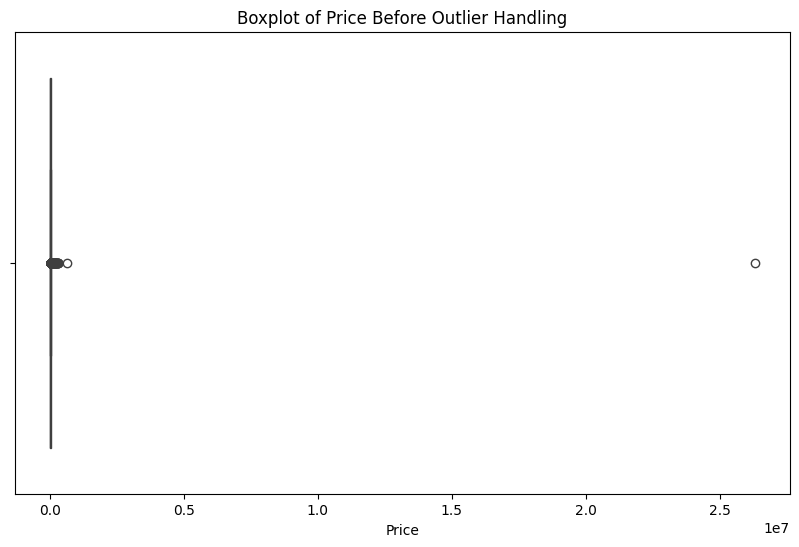

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Price'])
plt.title('Boxplot of Price Before Outlier Handling')
plt.xlabel('Price')
plt.show()

In [ ]:


Q1 = train_cleaned['Price'].quantile(0.25)
Q3 = train_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_median = train_cleaned['Price'].median()

train_cleaned['Price'] = train_cleaned['Price'].apply(
    lambda x: price_median if x < lower_bound or x > upper_bound else x
)

print("Outliers replaced with median. Data shape:", train_cleaned.shape)

Outliers replaced with median. Data shape: (14606, 18)


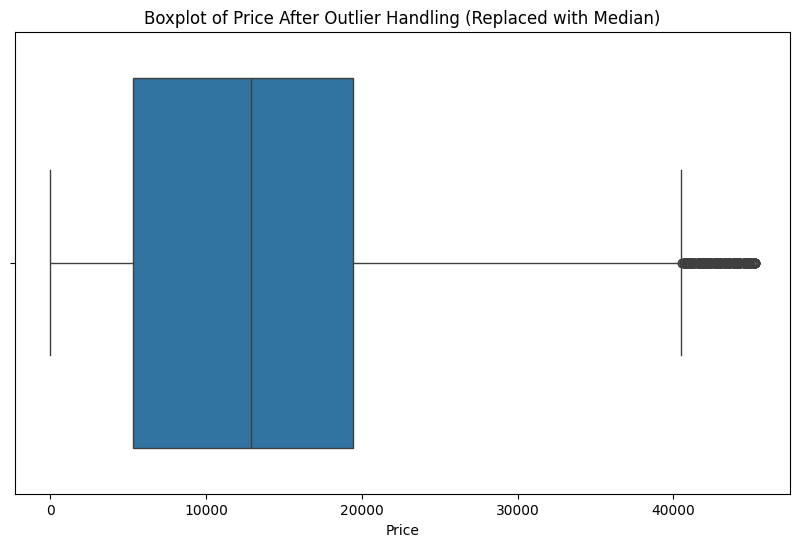

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Price'])
plt.title('Boxplot of Price After Outlier Handling (Replaced with Median)')
plt.xlabel('Price')
plt.show()

In [ ]:
print(train_cleaned['Levy'].describe())

count    14606.000000
mean       898.437338
std        383.891591
min         87.000000
25%        707.000000
50%        898.417676
75%        898.417676
max      11714.000000
Name: Levy, dtype: float64


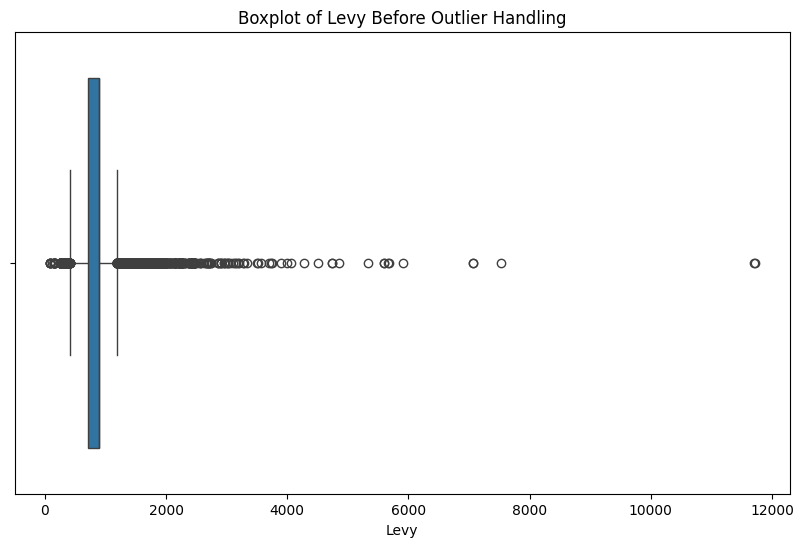

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Levy'])
plt.title('Boxplot of Levy Before Outlier Handling')
plt.xlabel('Levy')
plt.show()

In [ ]:
Q1 = train_cleaned['Levy'].quantile(0.25)
Q3 = train_cleaned['Levy'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_levy = train_cleaned['Levy'].median()
train_cleaned['Levy'] = train_cleaned['Levy'].apply(lambda x: median_levy if x < lower_bound or x > upper_bound else x)

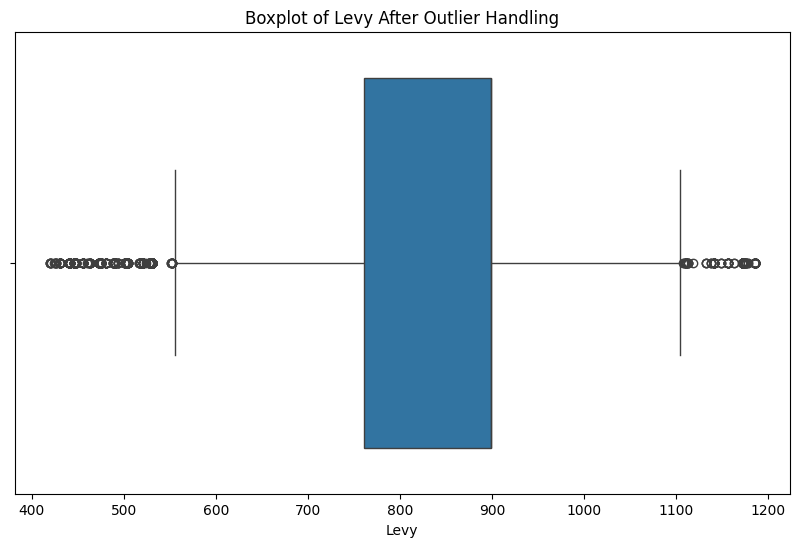

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Levy'])
plt.title('Boxplot of Levy After Outlier Handling')
plt.xlabel('Levy')
plt.show()

In [ ]:
print(train_cleaned['Prod. year'].describe())

count    14606.000000
mean      2010.073326
std          9.342252
min       1943.000000
25%       2004.000000
50%       2011.000000
75%       2018.000000
max       2022.000000
Name: Prod. year, dtype: float64


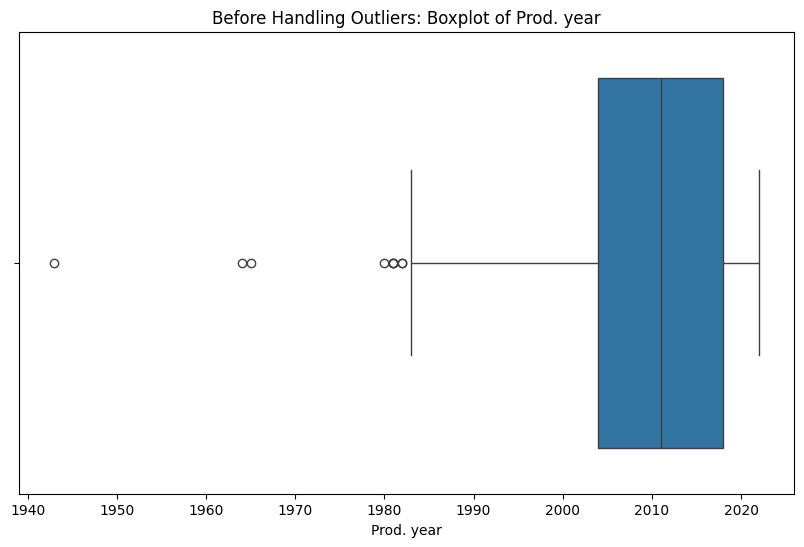

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Prod. year'])
plt.title('Before Handling Outliers: Boxplot of Prod. year')
plt.show()

In [ ]:
valid_years = (train_cleaned['Prod. year'] >= 1980) & (train_cleaned['Prod. year'] <= 2025)

median_prod_year = train_cleaned.loc[valid_years, 'Prod. year'].median()

train_cleaned.loc[~valid_years, 'Prod. year'] = median_prod_year

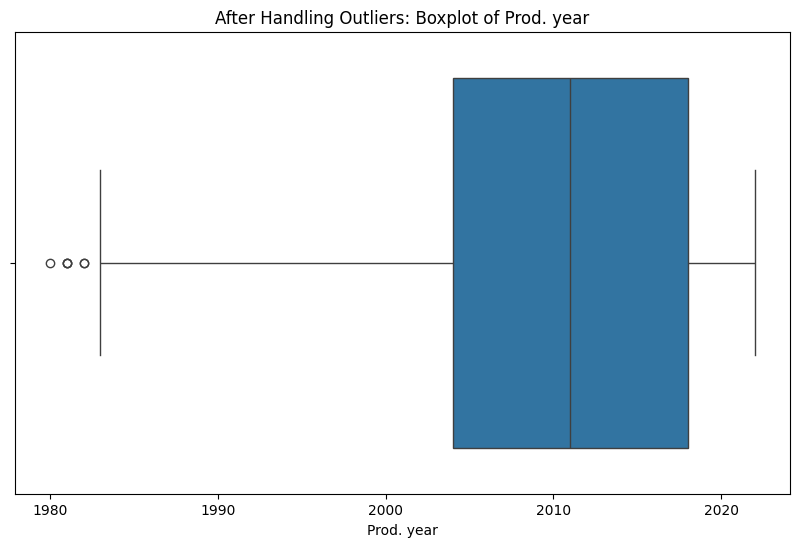

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Prod. year'])
plt.title('After Handling Outliers: Boxplot of Prod. year')
plt.show()

In [ ]:
print(train_cleaned['Mileage'].describe())

count    1.460600e+04
mean     4.052910e+05
std      2.207922e+05
min      0.000000e+00
25%      2.486750e+05
50%      4.432500e+05
75%      5.804045e+05
max      5.451812e+06
Name: Mileage, dtype: float64


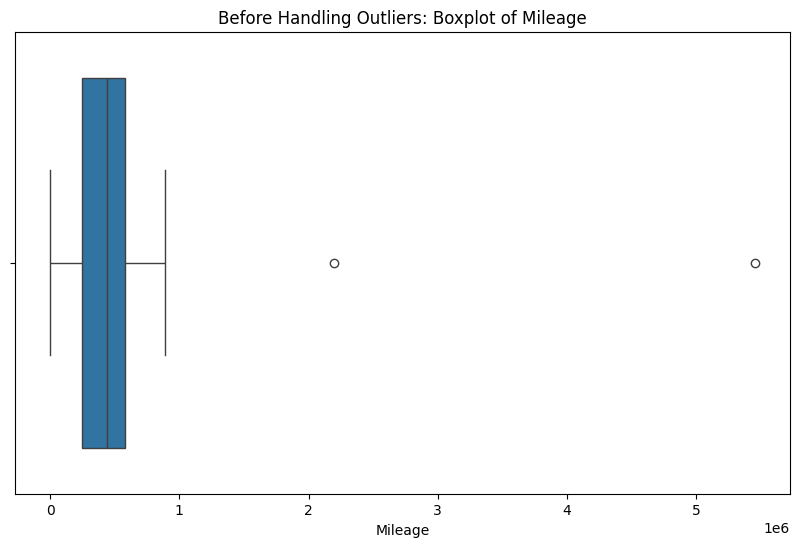

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Mileage'])
plt.title('Before Handling Outliers: Boxplot of Mileage')
plt.show()

In [ ]:
threshold_mileage = 300000

train_cleaned.loc[train_cleaned['Mileage'] > threshold_mileage, 'Mileage'] = train_cleaned['Mileage'].median()

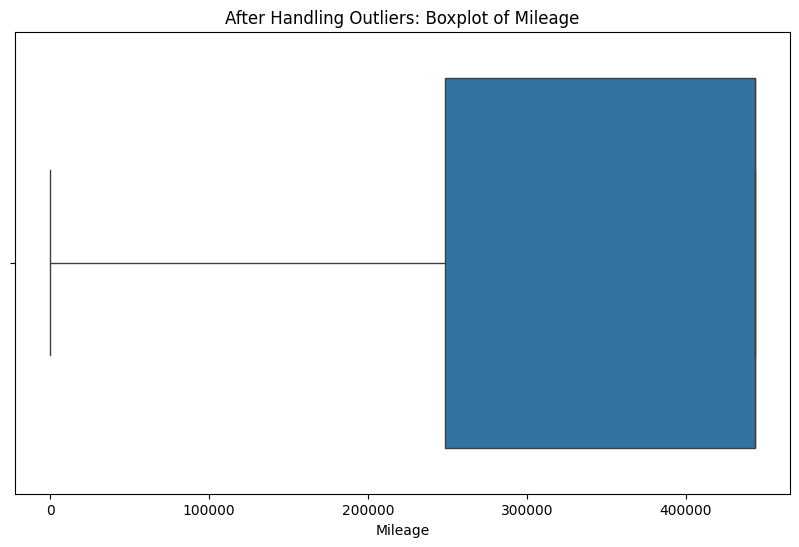

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cleaned['Mileage'])
plt.title('After Handling Outliers: Boxplot of Mileage')
plt.show()

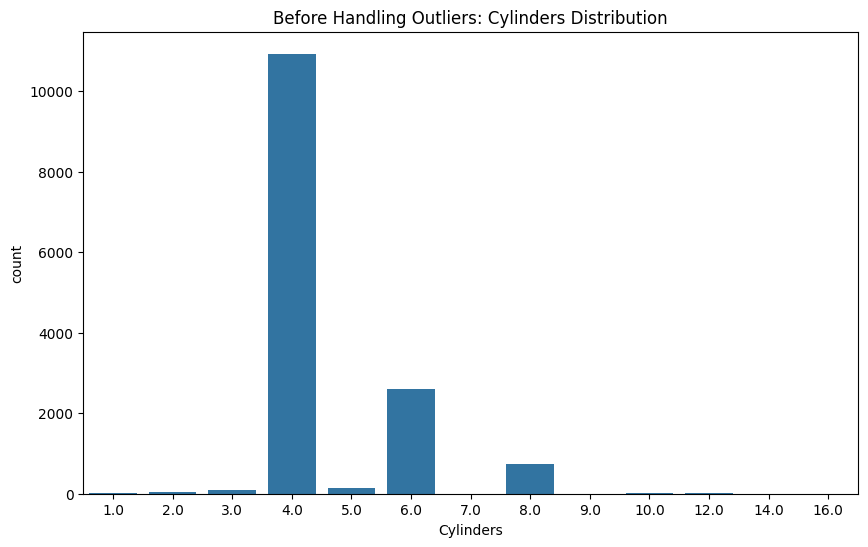

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_cleaned['Cylinders'])
plt.title('Before Handling Outliers: Cylinders Distribution')
plt.show()

In [ ]:
valid_cylinders = [4, 6, 8, 12]
mode_cylinders = train_cleaned['Cylinders'].mode()[0]

train_cleaned.loc[~train_cleaned['Cylinders'].isin(valid_cylinders), 'Cylinders'] = mode_cylinders

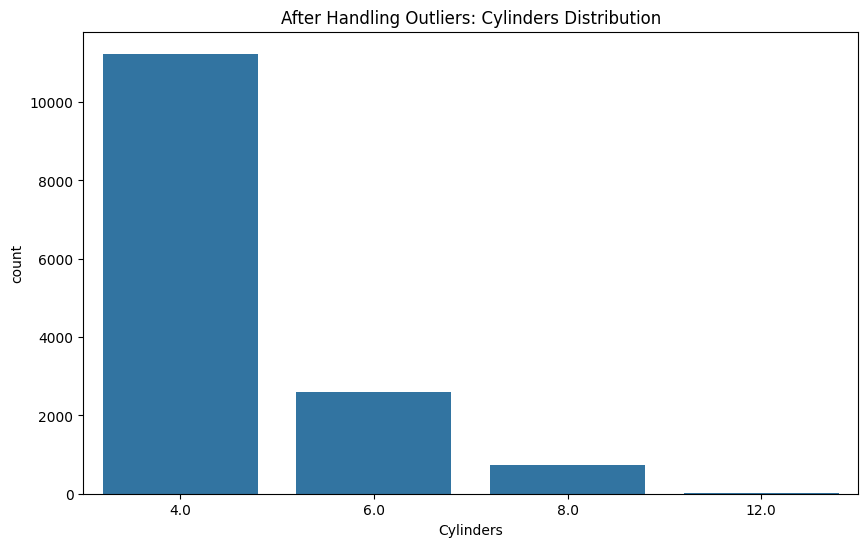

In [ ]:
# After handling outliers for Cylinders
plt.figure(figsize=(10, 6))
sns.countplot(x=train_cleaned['Cylinders'])
plt.title('After Handling Outliers: Cylinders Distribution')
plt.show()

In [ ]:
for col in test_cleaned.columns:
    print(f"\nColumn: {col}")
    print(test_cleaned[col].unique())


Column: ID
[45813960. 45730073. 45787895. ... 45772050. 45803936. 45619576.]

Column: Price
[5.49000e+02 4.12810e+04 1.56810e+04 3.68990e+04 1.52890e+04 8.46700e+03
 1.44260e+04 1.30000e+04 2.58100e+04 3.70060e+04 7.21300e+03 1.25440e+04
 4.70100e+03 2.13260e+04 1.00000e+02 3.00000e+01 4.86100e+03 7.06000e+02
 2.00000e+02 6.27200e+03 8.78100e+03 1.94440e+04 4.39050e+04 1.16040e+04
 4.32780e+04 2.03850e+04 2.10120e+04 2.16390e+04 3.38230e+04 2.50890e+04
 1.30000e+02 2.11810e+04 1.88170e+04 2.65910e+04 4.54730e+04 4.39100e+03
 1.05060e+04 3.66920e+04 1.41130e+04 5.64500e+03 9.41000e+02 3.05830e+04
 2.35210e+04 4.67280e+04 1.25220e+04 2.82000e+02 4.40000e+04 2.85390e+04
 2.37030e+04 2.47750e+04 2.45430e+04 1.57000e+02 1.03490e+04 3.76300e+03
 8.15400e+03 1.93060e+04 1.72490e+04 4.70400e+03 3.62310e+04 1.88200e+03
 6.42900e+03 3.07340e+04 1.48340e+04 1.33300e+03 1.69000e+04 3.09310e+04
 2.50900e+03 2.63430e+04 3.29300e+03 4.07700e+03 1.37990e+04 2.28940e+04
 3.92000e+03 2.61800e+04 4.0000

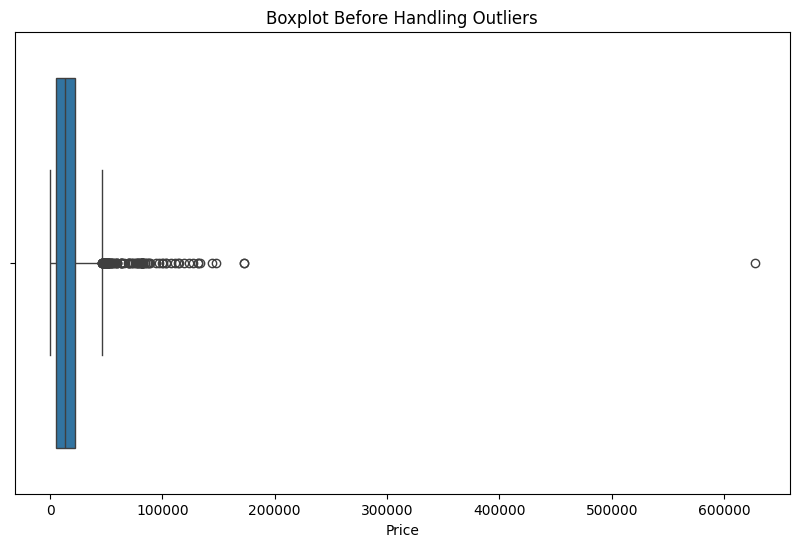

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Price'])
plt.title("Boxplot Before Handling Outliers")
plt.show()

In [ ]:
Q1 = test_cleaned['Price'].quantile(0.25)
Q3 = test_cleaned['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (test_cleaned['Price'] < lower_bound) | (test_cleaned['Price'] > upper_bound)

mean_value = test_cleaned['Price'].mean()

test_cleaned['Price'] = np.where(outliers, mean_value, test_cleaned['Price'])

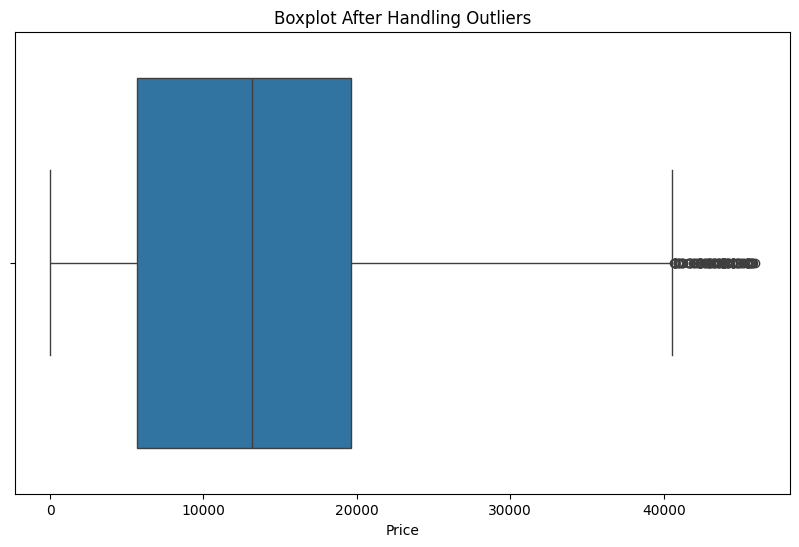

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Price'])
plt.title("Boxplot After Handling Outliers")
plt.show()

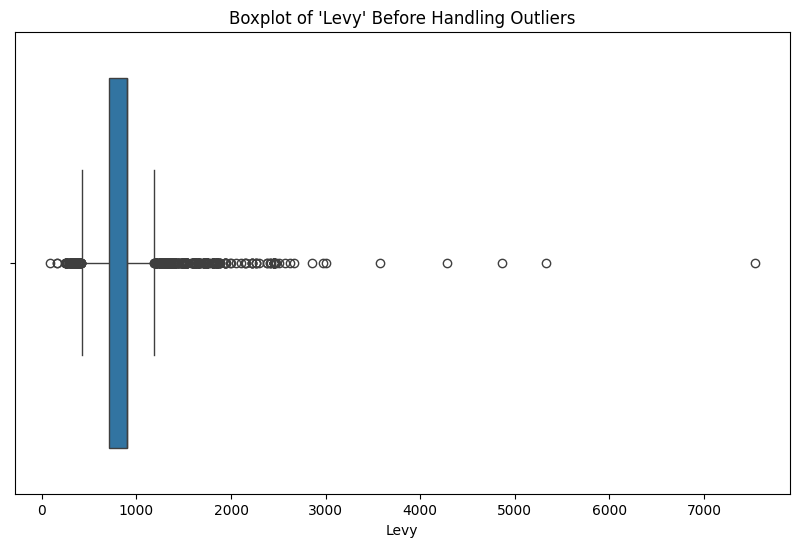

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Levy'])
plt.title("Boxplot of 'Levy' Before Handling Outliers")
plt.show()

In [ ]:
Q1 = test_cleaned['Levy'].quantile(0.25)
Q3 = test_cleaned['Levy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (test_cleaned['Levy'] < lower_bound) | (test_cleaned['Levy'] > upper_bound)

mean_without_outliers = test_cleaned.loc[~outliers, 'Levy'].mean()
test_cleaned['Levy'] = np.where(outliers, mean_without_outliers, test_cleaned['Levy'])

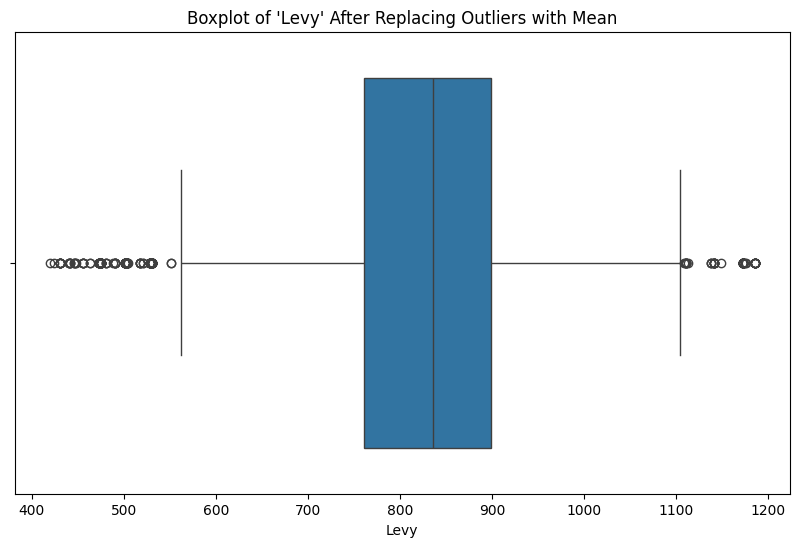

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Levy'])
plt.title("Boxplot of 'Levy' After Replacing Outliers with Mean")
plt.show()

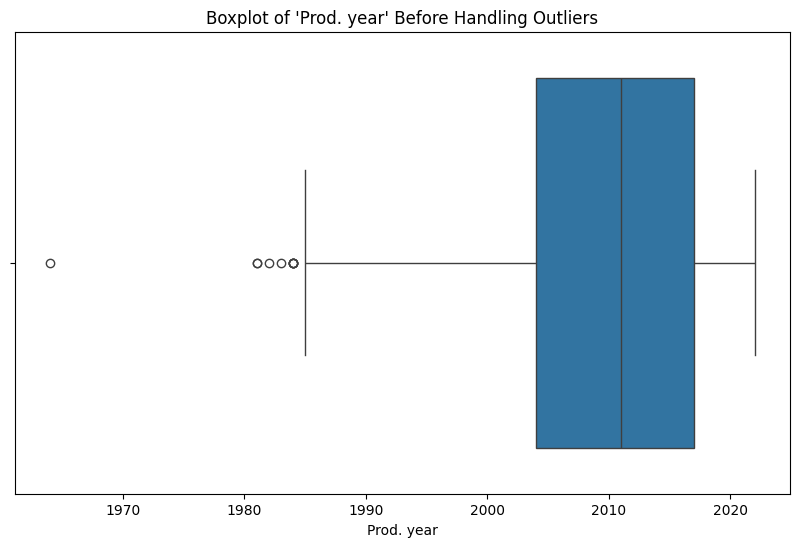

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Prod. year'])
plt.title("Boxplot of 'Prod. year' Before Handling Outliers")
plt.show()

In [ ]:
Q1_year = test_cleaned['Prod. year'].quantile(0.25)
Q3_year = test_cleaned['Prod. year'].quantile(0.75)
IQR_year = Q3_year - Q1_year
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

outliers_year = (test_cleaned['Prod. year'] < lower_bound_year) | (test_cleaned['Prod. year'] > upper_bound_year)

mean_year = round(test_cleaned.loc[~outliers_year, 'Prod. year'].mean())
test_cleaned['Prod. year'] = np.where(outliers_year, mean_year, test_cleaned['Prod. year'])

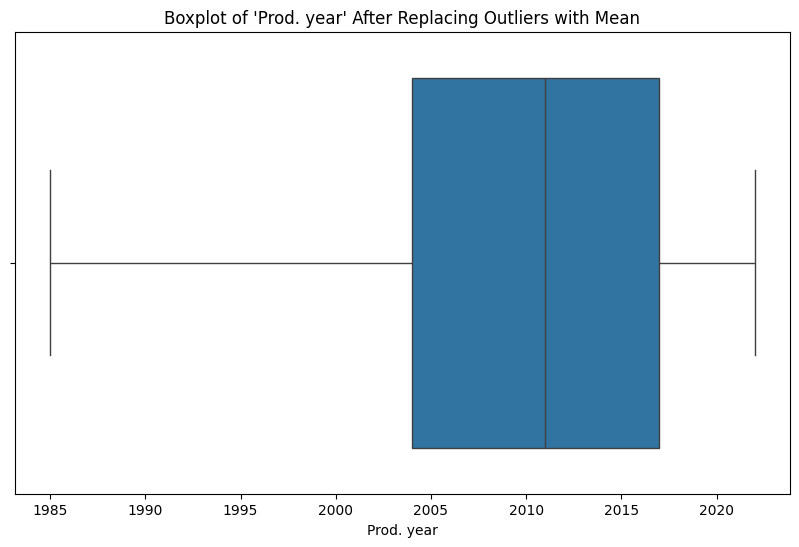

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Prod. year'])
plt.title("Boxplot of 'Prod. year' After Replacing Outliers with Mean")
plt.show()

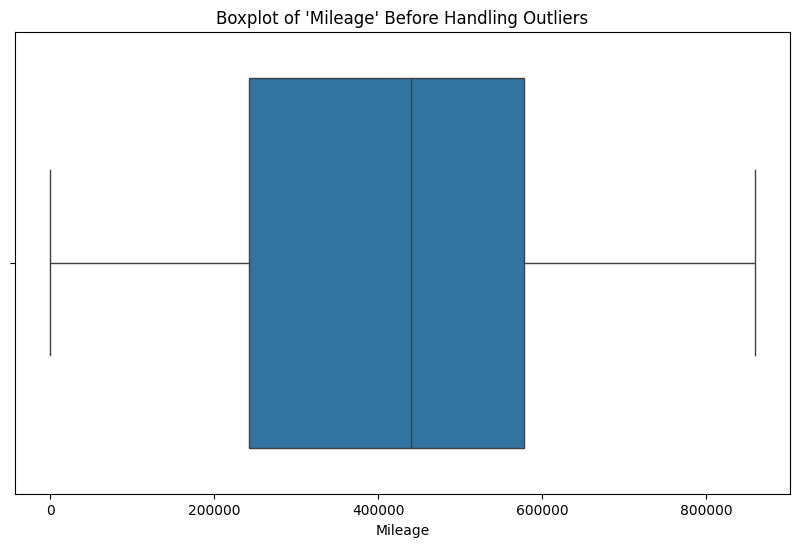

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Mileage'])
plt.title("Boxplot of 'Mileage' Before Handling Outliers")
plt.show()

In [ ]:
Q1_mileage = test_cleaned['Mileage'].quantile(0.25)
Q3_mileage = test_cleaned['Mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

outliers_mileage = (test_cleaned['Mileage'] < lower_bound_mileage) | (test_cleaned['Mileage'] > upper_bound_mileage)
mean_mileage = test_cleaned.loc[~outliers_mileage, 'Mileage'].mean()
test_cleaned['Mileage'] = np.where(outliers_mileage, mean_mileage, test_cleaned['Mileage'])

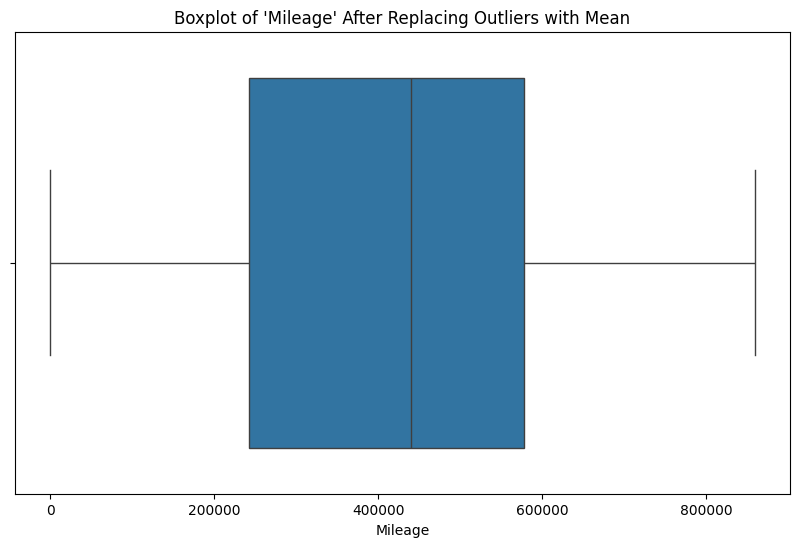

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_cleaned['Mileage'])
plt.title("Boxplot of 'Mileage' After Replacing Outliers with Mean")
plt.show()

In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 0 to 14910
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                14606 non-null  float64
 1   Price             14606 non-null  float64
 2   Levy              14606 non-null  float64
 3   Manufacturer      14606 non-null  object 
 4   Model             14606 non-null  object 
 5   Prod. year        14606 non-null  float64
 6   Category          14606 non-null  object 
 7   Leather interior  14606 non-null  object 
 8   Fuel type         14606 non-null  object 
 9   Engine volume     14606 non-null  float64
 10  Mileage           14606 non-null  float64
 11  Cylinders         14606 non-null  float64
 12  Gear box type     14606 non-null  object 
 13  Drive wheels      14606 non-null  object 
 14  Doors             14606 non-null  object 
 15  Wheel             14606 non-null  object 
 16  Color             14606 non-null  object 
 17

# feature engineering

In [ ]:
from datetime import datetime
current_year = datetime.now().year

train_cleaned['car_age'] = current_year - train_cleaned['Prod. year']

In [ ]:
train_cleaned.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,car_age
0,45813960.0,549.0,891.000000,MERCEDES-BENZ,CLA 250,2021.0,Sedan,Yes,Petrol,2.0,443250.0,4.0,Automatic,Front,4,Left wheel,White,12.0,4.0
1,45730073.0,41281.0,730.000000,SSANGYONG,Actyon,1987.0,Jeep,Yes,Diesel,1.6,10573.0,4.0,Automatic,Front,4,Left wheel,Blue,4.0,38.0
2,45787895.0,15681.0,898.417676,MERCEDES-BENZ,ML 350,2008.0,Jeep,Yes,LPG,3.5,443250.0,6.0,Tiptronic,4x4,4,Left wheel,Silver,12.0,17.0
3,45731438.0,36899.0,777.000000,HYUNDAI,H1,1990.0,Minivan,Yes,Diesel,2.5,15200.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,35.0
4,45797083.0,15289.0,836.000000,HYUNDAI,Genesis,2007.0,Coupe,Yes,Petrol,2.0,443250.0,4.0,Automatic,Front,4,Left wheel,Red,4.0,18.0


# Visualization

<Axes: xlabel='Price', ylabel='Count'>

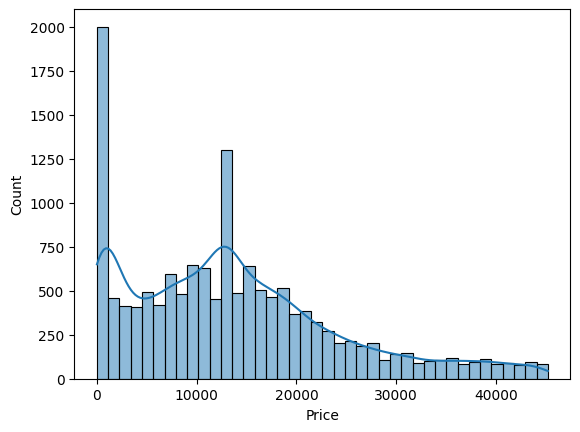

In [ ]:
sns.histplot(train_cleaned['Price'], kde=True)


In [ ]:
plot_data = train_cleaned.copy(deep=True)

In [ ]:
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 0 to 14910
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                14606 non-null  float64
 1   Price             14606 non-null  float64
 2   Levy              14606 non-null  float64
 3   Manufacturer      14606 non-null  object 
 4   Model             14606 non-null  object 
 5   Prod. year        14606 non-null  float64
 6   Category          14606 non-null  object 
 7   Leather interior  14606 non-null  object 
 8   Fuel type         14606 non-null  object 
 9   Engine volume     14606 non-null  float64
 10  Mileage           14606 non-null  float64
 11  Cylinders         14606 non-null  float64
 12  Gear box type     14606 non-null  object 
 13  Drive wheels      14606 non-null  object 
 14  Doors             14606 non-null  object 
 15  Wheel             14606 non-null  object 
 16  Color             14606 non-null  object 
 17

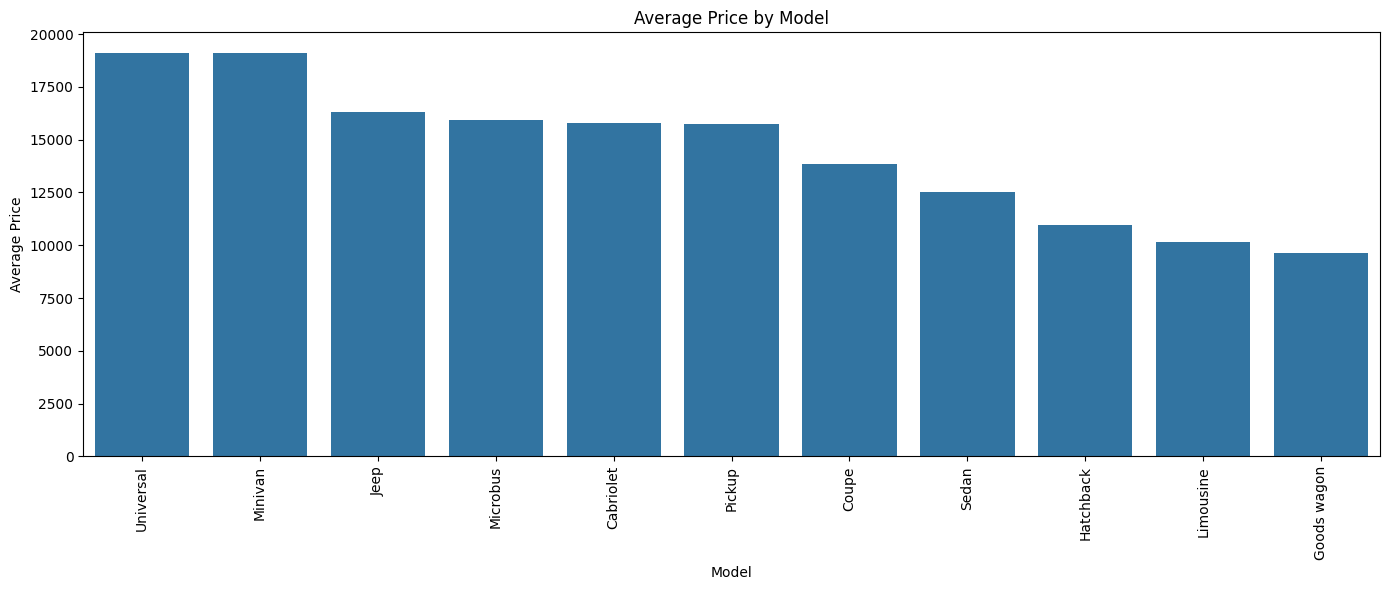

In [ ]:
plt.figure(figsize=(14,6))
avg_price_manufacturer = plot_data.groupby('Category')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_manufacturer.index, y=avg_price_manufacturer.values)
plt.xticks(rotation=90)
plt.title('Average Price by Model')
plt.ylabel('Average Price')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


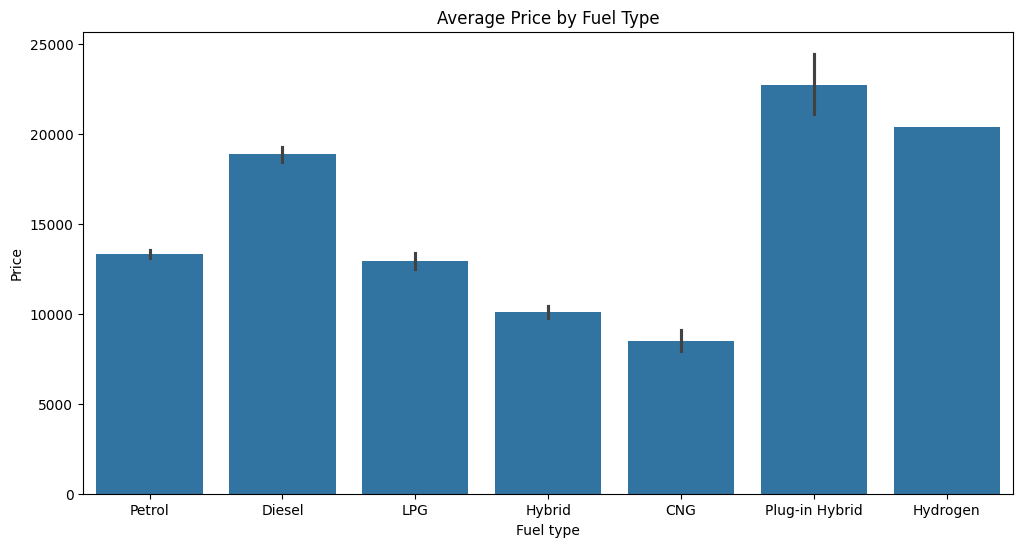

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Fuel type', y='Price', estimator='mean')
plt.title('Average Price by Fuel Type')
plt.show()

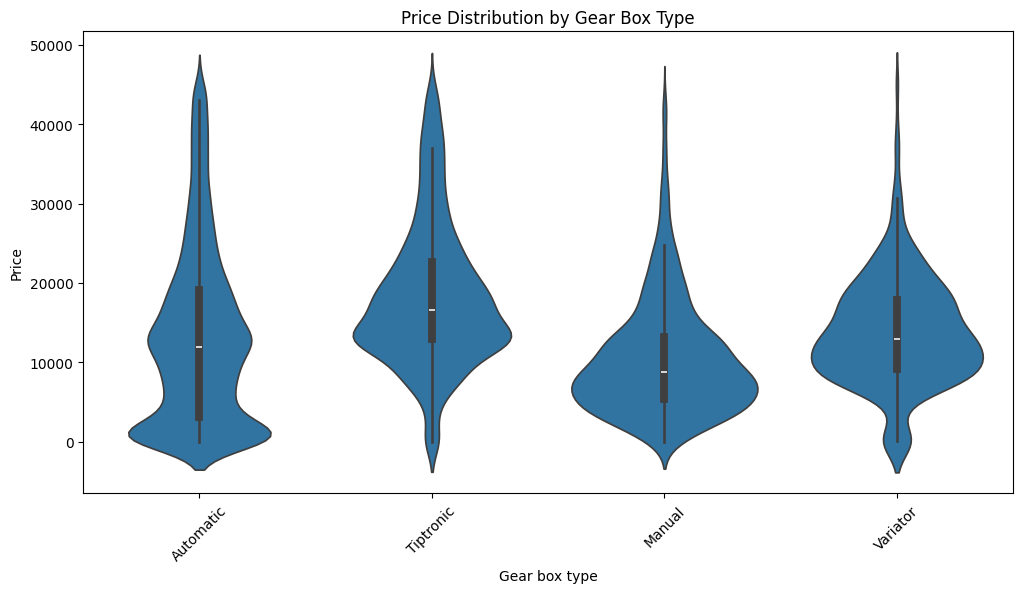

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=plot_data, x='Gear box type', y='Price')
plt.title('Price Distribution by Gear Box Type')
plt.xticks(rotation=45)
plt.show()

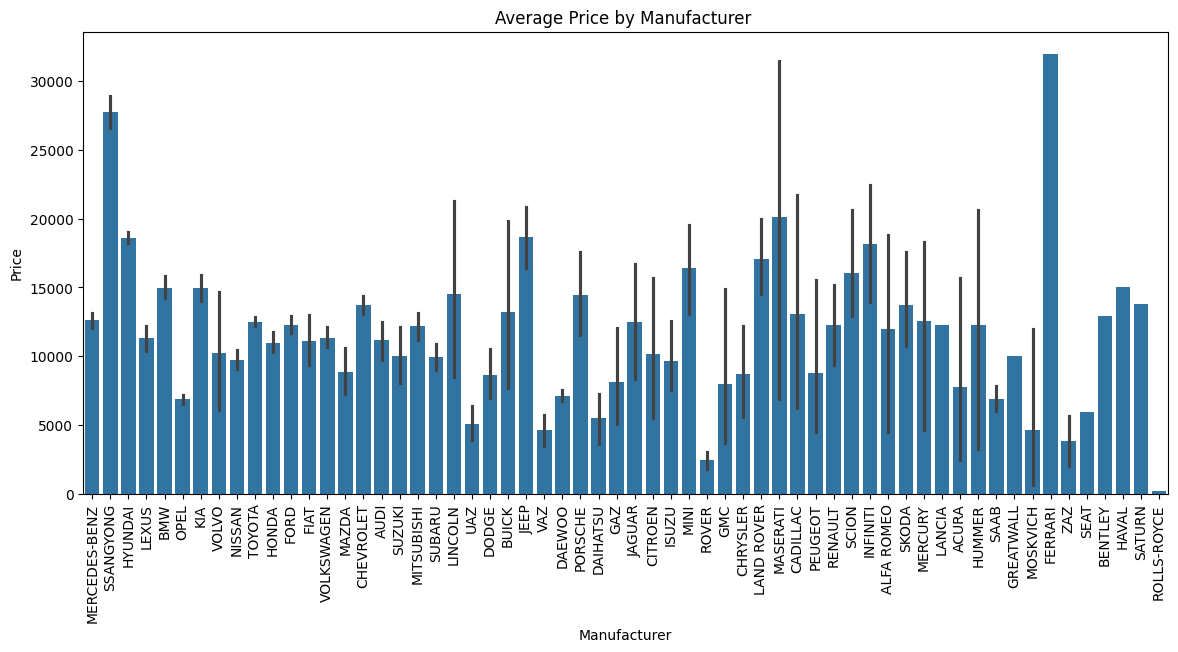

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=plot_data, x='Manufacturer', y='Price', estimator='mean')
plt.title('Average Price by Manufacturer ')
plt.xticks(rotation=90)
plt.show()


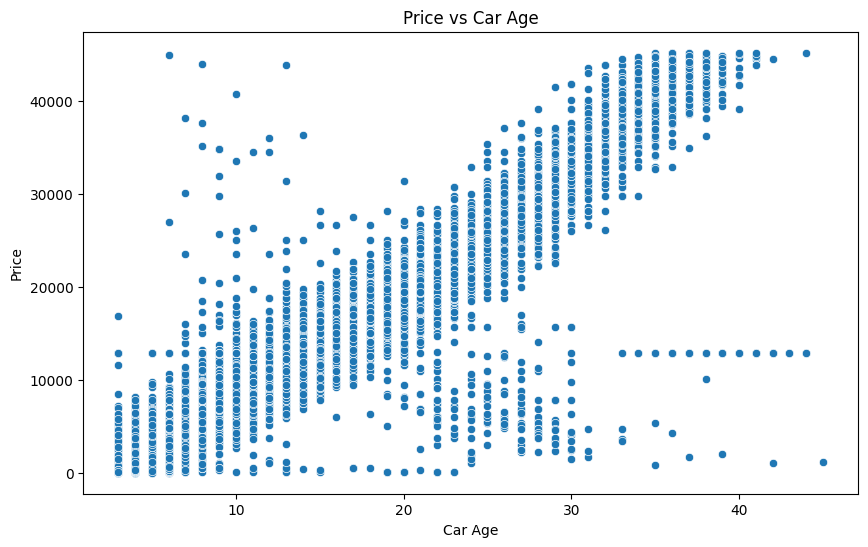

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='car_age', y='Price')
plt.title('Price vs Car Age')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()


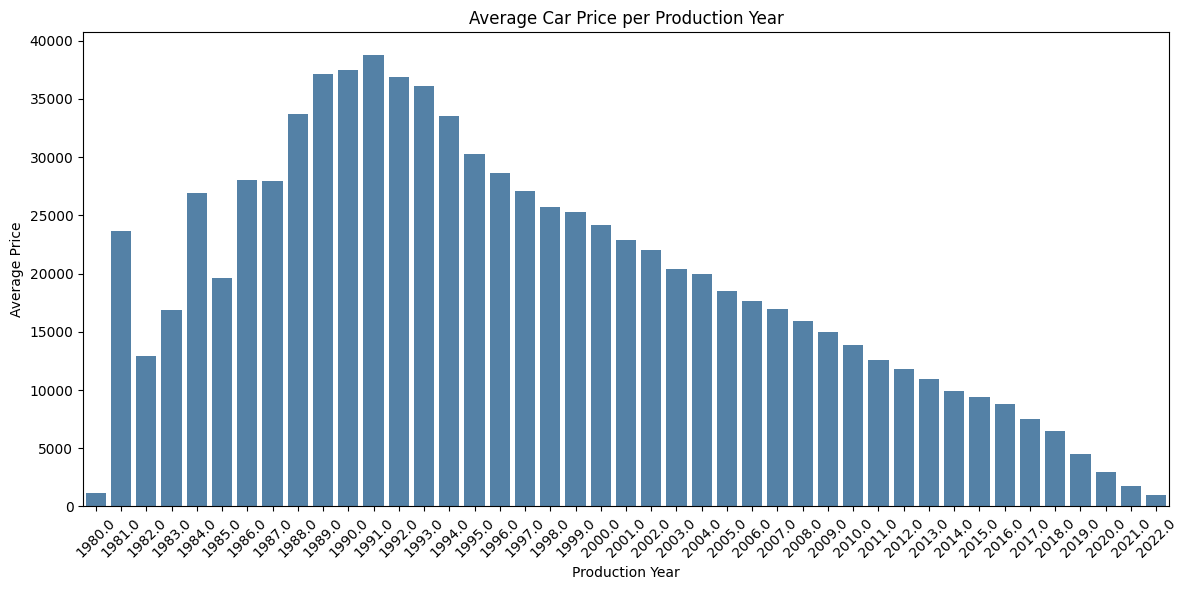

In [ ]:
temp_data = plot_data.copy()

temp_data = temp_data.dropna(subset=["Prod. year", "Price"])

avg_price_per_year = temp_data.groupby("Prod. year")["Price"].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Prod. year", y="Price", data=avg_price_per_year, color="steelblue")
plt.xticks(rotation=45)
plt.title("Average Car Price per Production Year")
plt.xlabel("Production Year")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()



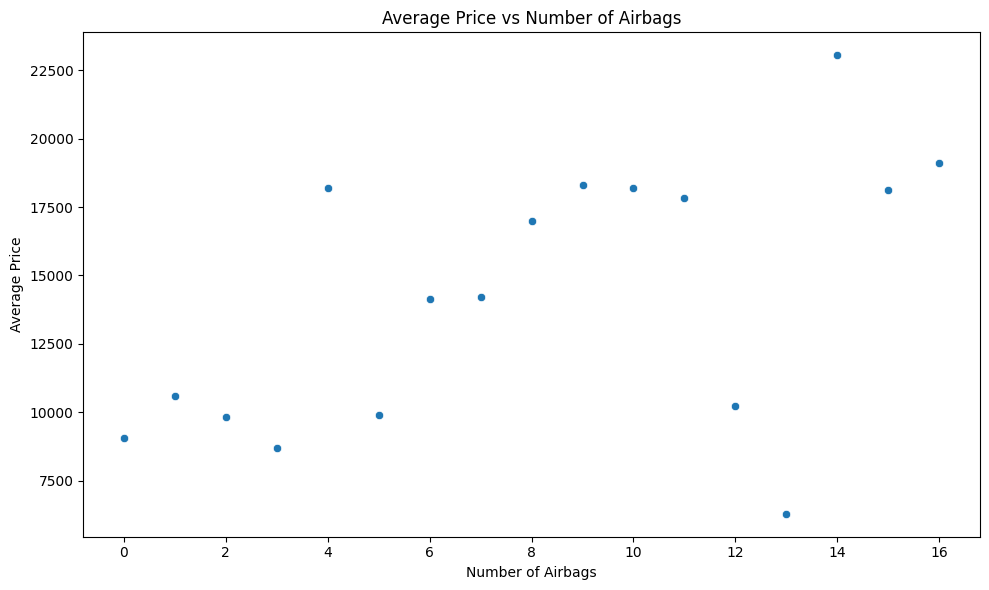

In [ ]:
avg_price_per_airbag = plot_data.groupby('Airbags')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_price_per_airbag, x='Airbags', y='Price')
plt.title('Average Price vs Number of Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


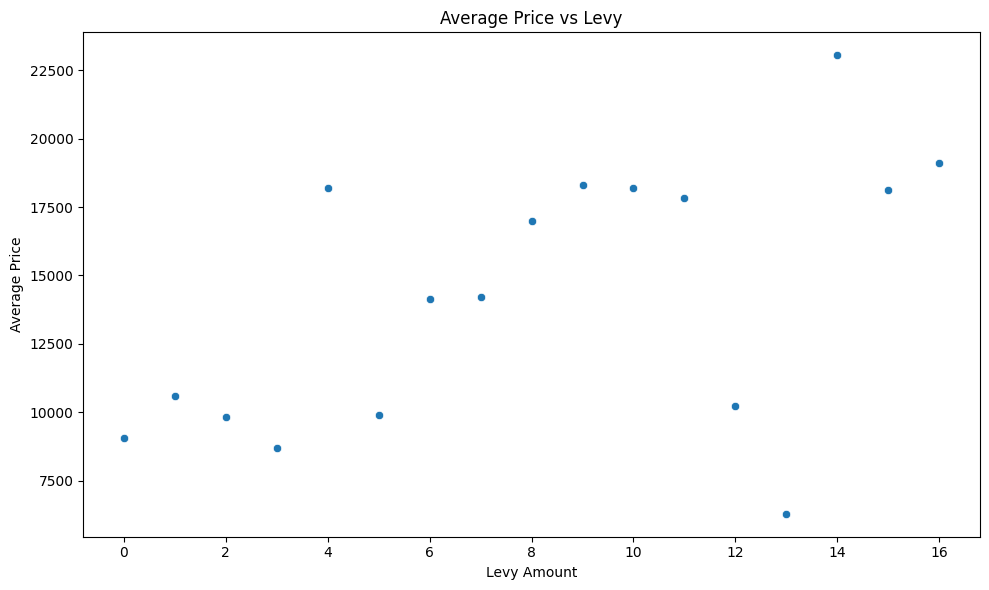

In [ ]:
avg_price_per_levy = plot_data.groupby('Levy')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_price_per_airbag, x='Airbags', y='Price')
plt.title('Average Price vs Levy')
plt.xlabel('Levy Amount')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


 # Encoding

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Manufacturer']])

# Transform both
train_cleaned['Manufacturer'] = encoder.transform(train_cleaned[['Manufacturer']])
test_cleaned['Manufacturer'] = encoder.transform(test_cleaned[['Manufacturer']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Category']])

# Transform both
train_cleaned['Category'] = encoder.transform(train_cleaned[['Category']])
test_cleaned['Category'] = encoder.transform(test_cleaned[['Category']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Leather interior']])

# Transform both
train_cleaned['Leather interior'] = encoder.transform(train_cleaned[['Leather interior']])
test_cleaned['Leather interior'] = encoder.transform(test_cleaned[['Leather interior']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Fuel type']])

# Transform both
train_cleaned['Fuel type'] = encoder.transform(train_cleaned[['Fuel type']])
test_cleaned['Fuel type'] = encoder.transform(test_cleaned[['Fuel type']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Model']])

# Transform both
train_cleaned['Model'] = encoder.transform(train_cleaned[['Model']])
test_cleaned['Model'] = encoder.transform(test_cleaned[['Model']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Drive wheels']])

# Transform both
train_cleaned['Drive wheels'] = encoder.transform(train_cleaned[['Drive wheels']])
test_cleaned['Drive wheels'] = encoder.transform(test_cleaned[['Drive wheels']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Wheel']])

# Transform both
train_cleaned['Wheel'] = encoder.transform(train_cleaned[['Wheel']])
test_cleaned['Wheel'] = encoder.transform(test_cleaned[['Wheel']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Color']])

# Transform both
train_cleaned['Color'] = encoder.transform(train_cleaned[['Color']])
test_cleaned['Color'] = encoder.transform(test_cleaned[['Color']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Doors']])

# Transform both
train_cleaned['Doors'] = encoder.transform(train_cleaned[['Doors']])
test_cleaned['Doors'] = encoder.transform(test_cleaned[['Doors']])

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train only
encoder.fit(train_cleaned[['Gear box type']])

# Transform both
train_cleaned['Gear box type'] = encoder.transform(train_cleaned[['Gear box type']])
test_cleaned['Gear box type'] = encoder.transform(test_cleaned[['Gear box type']])

In [ ]:
train_cleaned.head(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,car_age
0,45813960.0,549.0,891.000000,34.0,312.0,2021.0,9.0,1.0,5.0,2.0,443250.0,4.0,0.0,1.0,1.0,0.0,14.0,12.0,4.0
1,45730073.0,41281.0,730.000000,51.0,201.0,1987.0,4.0,1.0,1.0,1.6,10573.0,4.0,0.0,1.0,1.0,0.0,2.0,4.0,38.0
2,45787895.0,15681.0,898.417676,34.0,831.0,2008.0,4.0,1.0,4.0,3.5,443250.0,6.0,2.0,0.0,1.0,0.0,12.0,12.0,17.0
3,45731438.0,36899.0,777.000000,22.0,697.0,1990.0,7.0,1.0,1.0,2.5,15200.0,4.0,0.0,1.0,1.0,0.0,12.0,4.0,35.0
4,45797083.0,15289.0,836.000000,22.0,675.0,2007.0,1.0,1.0,5.0,2.0,443250.0,4.0,0.0,1.0,1.0,0.0,11.0,4.0,18.0
5,45733076.0,8467.0,639.000000,22.0,1125.0,2018.0,9.0,1.0,4.0,2.0,443250.0,4.0,0.0,1.0,1.0,0.0,8.0,4.0,7.0
6,45811124.0,14426.0,898.417676,30.0,1047.0,2008.0,4.0,1.0,2.0,3.5,58506.0,6.0,0.0,0.0,1.0,0.0,7.0,0.0,17.0
7,45806021.0,13000.0,898.417676,34.0,507.0,2010.0,9.0,1.0,5.0,5.0,443250.0,8.0,2.0,2.0,1.0,0.0,1.0,12.0,15.0
8,45802797.0,25810.0,697.000000,22.0,1099.0,2001.0,4.0,1.0,1.0,2.2,176800.0,4.0,0.0,1.0,1.0,0.0,1.0,4.0,24.0
9,45656196.0,37006.0,898.417676,4.0,65.0,1992.0,9.0,1.0,1.0,2.0,204000.0,4.0,2.0,2.0,1.0,0.0,2.0,8.0,33.0


In [ ]:

train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 0 to 14910
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                14606 non-null  float64
 1   Price             14606 non-null  float64
 2   Levy              14606 non-null  float64
 3   Manufacturer      14606 non-null  float64
 4   Model             14606 non-null  float64
 5   Prod. year        14606 non-null  float64
 6   Category          14606 non-null  float64
 7   Leather interior  14606 non-null  float64
 8   Fuel type         14606 non-null  float64
 9   Engine volume     14606 non-null  float64
 10  Mileage           14606 non-null  float64
 11  Cylinders         14606 non-null  float64
 12  Gear box type     14606 non-null  float64
 13  Drive wheels      14606 non-null  float64
 14  Doors             14606 non-null  float64
 15  Wheel             14606 non-null  float64
 16  Color             14606 non-null  float64
 17

In [ ]:
test_cleaned.head(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45813960.0,549.0,891.000000,22.0,1099.0,2021,4.0,1.0,1.0,2.2,69852.0,4.0,0.0,1.0,1.0,0.0,7.0,12.0
1,45730073.0,41281.0,730.000000,22.0,1125.0,1987,9.0,1.0,2.0,2.4,659325.0,4.0,0.0,1.0,1.0,0.0,1.0,4.0
2,45787895.0,15681.0,898.417676,54.0,973.0,2008,3.0,1.0,5.0,1.8,238600.0,6.0,3.0,1.0,1.0,0.0,12.0,12.0
3,45731438.0,36899.0,777.000000,34.0,496.0,1990,9.0,0.0,5.0,2.0,644900.0,4.0,1.0,1.0,1.0,0.0,11.0,4.0
4,45797083.0,15289.0,836.000000,34.0,496.0,2007,9.0,1.0,1.0,3.5,695000.0,4.0,0.0,0.0,1.0,0.0,12.0,4.0
5,45733076.0,8467.0,639.000000,20.0,1166.0,2018,7.0,0.0,4.0,2.0,461500.0,4.0,0.0,0.0,1.0,1.0,12.0,4.0
6,45811124.0,14426.0,820.715504,4.0,-1.0,2008,1.0,1.0,5.0,3.0,344200.0,6.0,2.0,2.0,1.0,0.0,14.0,0.0
7,45806021.0,13000.0,898.417676,34.0,1150.0,2010,6.0,0.0,1.0,2.2,11013.0,8.0,1.0,2.0,1.0,0.0,14.0,12.0
8,45802797.0,25810.0,697.000000,4.0,78.0,2001,1.0,1.0,0.0,3.0,272900.0,4.0,2.0,2.0,0.0,0.0,2.0,4.0
9,45656196.0,37006.0,898.417676,34.0,-1.0,1992,0.0,1.0,5.0,3.0,16459.0,4.0,2.0,2.0,0.0,0.0,12.0,8.0


In [ ]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3727
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3646 non-null   float64
 1   Price             3694 non-null   float64
 2   Levy              3694 non-null   float64
 3   Manufacturer      3694 non-null   float64
 4   Model             3694 non-null   float64
 5   Prod. year        3694 non-null   int64  
 6   Category          3694 non-null   float64
 7   Leather interior  3694 non-null   float64
 8   Fuel type         3694 non-null   float64
 9   Engine volume     3694 non-null   float64
 10  Mileage           3694 non-null   float64
 11  Cylinders         3694 non-null   float64
 12  Gear box type     3694 non-null   float64
 13  Drive wheels      3694 non-null   float64
 14  Doors             3694 non-null   float64
 15  Wheel             3694 non-null   float64
 16  Color             3694 non-null   float64
 17  

# Feature Selection

In [ ]:
train_cleaned = train_cleaned.drop('ID', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
scaler = StandardScaler()
train_cleaned[numeric_cols] = scaler.fit_transform(train_cleaned[numeric_cols])
test_cleaned[numeric_cols] = scaler.transform(test_cleaned[numeric_cols])



# checking correlation

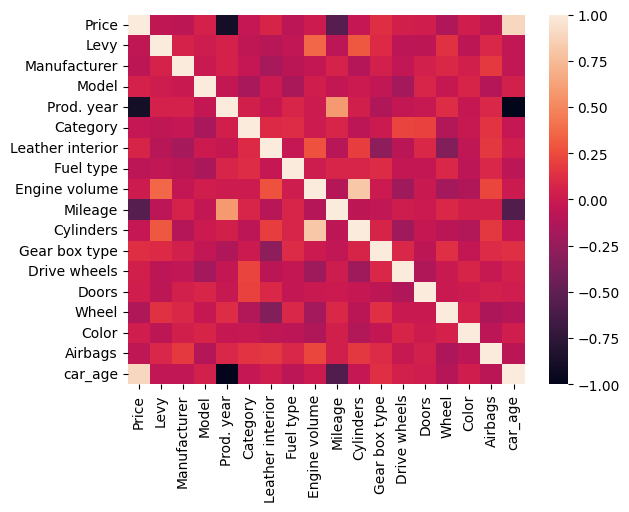

In [ ]:
sns.heatmap(train_cleaned.corr())
plt.show()

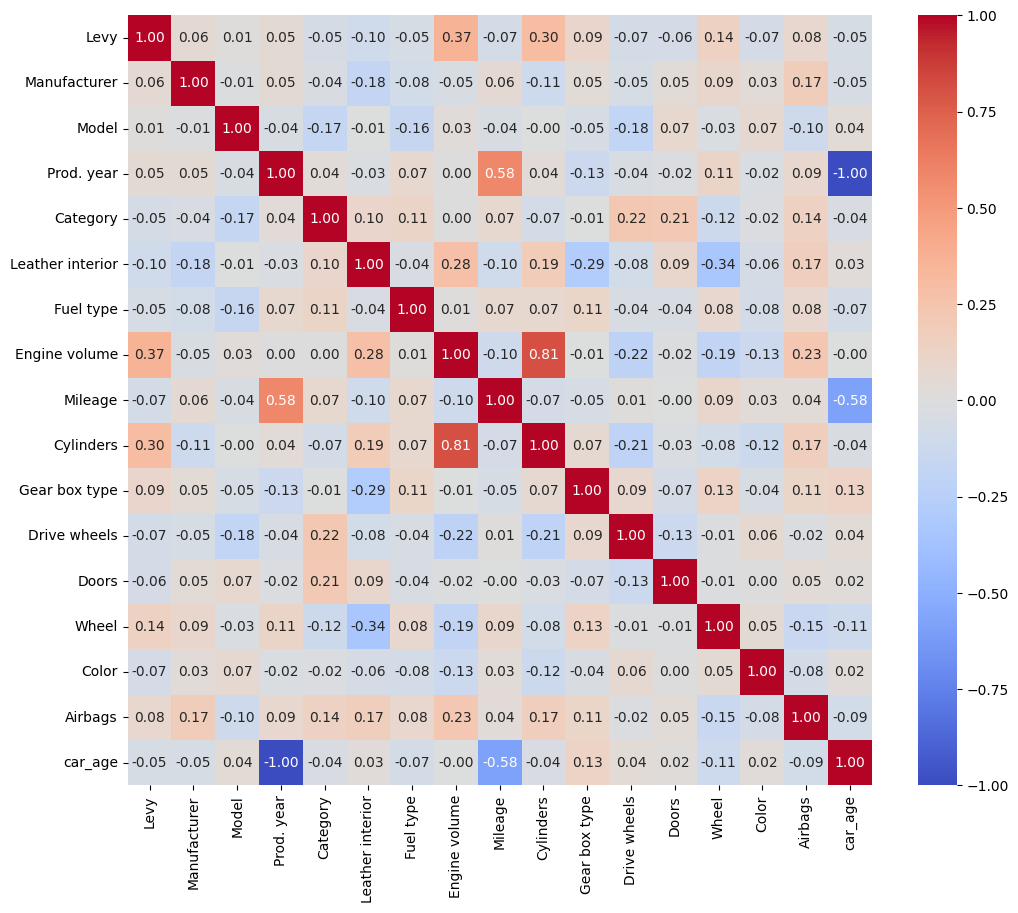

In [ ]:
# Calculate the correlation matrix

## Select only numerical columns
numerical_columns = train_cleaned.select_dtypes(include=np.number).columns.drop("Price")
correlation_matrix = train_cleaned[numerical_columns].corr()

plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

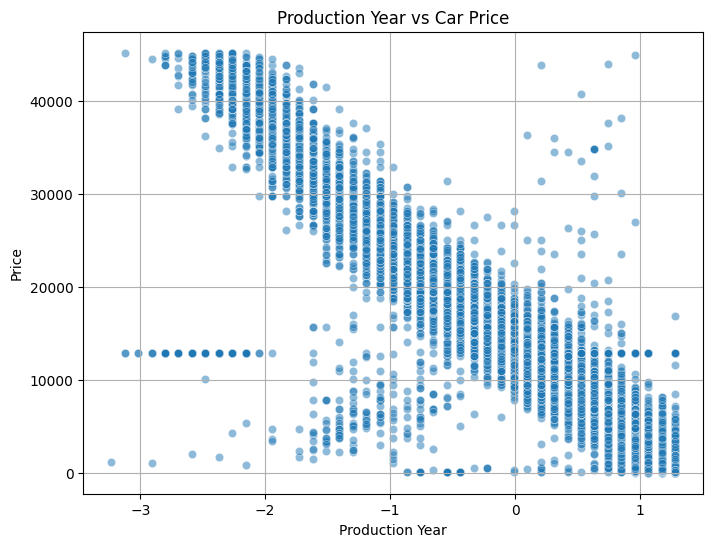

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Production Year vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_cleaned, x='Prod. year', y='Price', alpha=0.5)
plt.title("Production Year vs Car Price")
plt.xlabel("Production Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# feature selection

Levy               -0.061177
Manufacturer       -0.064764
Model               0.052012
Prod. year         -0.892937
Category           -0.037774
Leather interior    0.067834
Fuel type          -0.072115
Engine volume       0.001246
Mileage            -0.547771
Cylinders          -0.035899
Gear box type       0.123036
Drive wheels        0.032335
Doors               0.028524
Wheel              -0.137907
Color               0.028876
Airbags            -0.057717
car_age             0.892937
dtype: float64


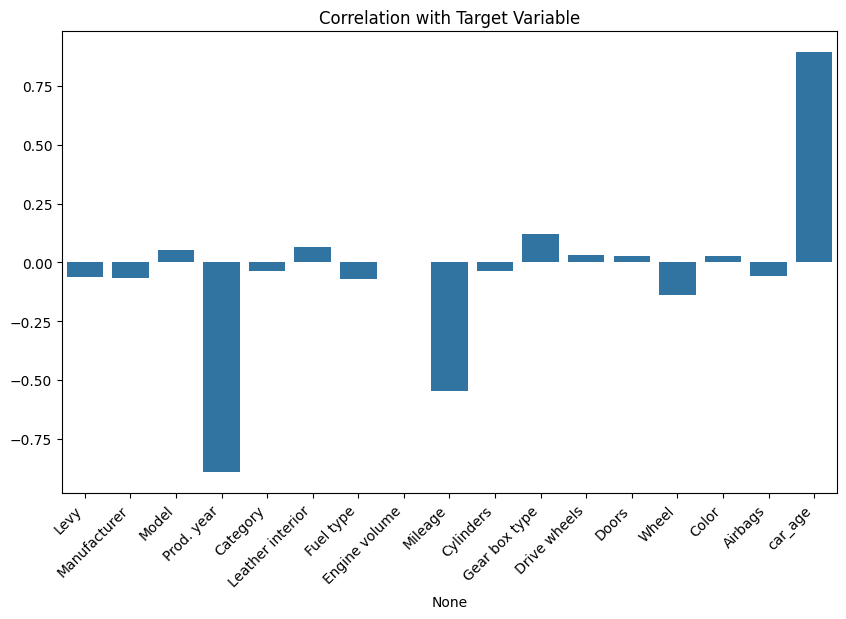

In [ ]:
# Calculate the correlation between numerical features and the label
correlations_with_target = train_cleaned[numerical_columns].corrwith(train_cleaned['Price'])

# Display the correlation values
print(correlations_with_target)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Target Variable')
plt.show()

In [ ]:
sorted_features = correlations_with_target.abs().sort_values(ascending=False)

# Print or visualize the sorted features
print(sorted_features)

car_age             0.892937
Prod. year          0.892937
Mileage             0.547771
Wheel               0.137907
Gear box type       0.123036
Fuel type           0.072115
Leather interior    0.067834
Manufacturer        0.064764
Levy                0.061177
Airbags             0.057717
Model               0.052012
Category            0.037774
Cylinders           0.035899
Drive wheels        0.032335
Color               0.028876
Doors               0.028524
Engine volume       0.001246
dtype: float64


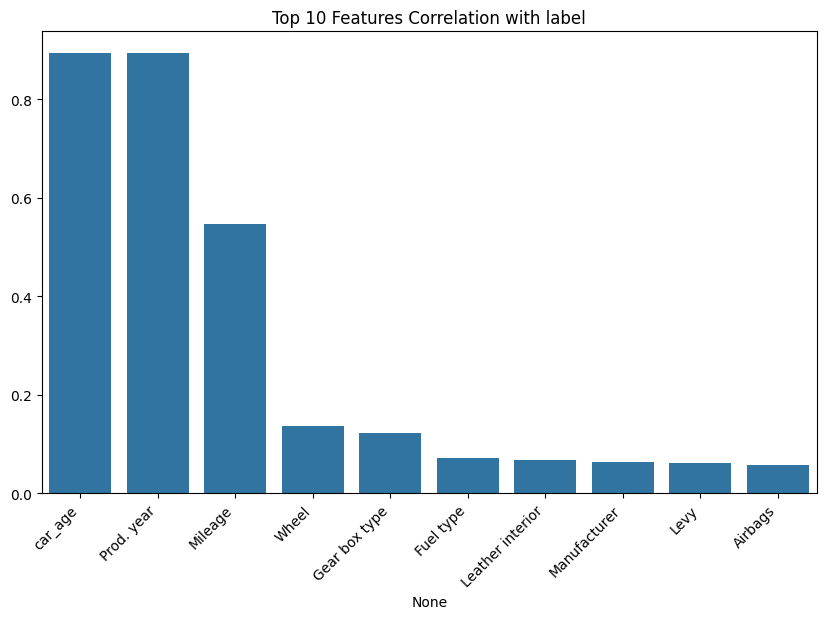

In [ ]:
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.index[:top_n], y=sorted_features.values[:top_n])
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Features Correlation with label')
plt.show()

In [ ]:
train_cleaned.to_csv('train_cleaned.csv', index=False)
test_cleaned.to_csv('test_cleaned.csv', index=False)

In [ ]:
# Select features and target
selected_features = ['Airbags', 'Prod. year', 'Mileage','Drive wheels','Wheel',
                     'Gear box type', 'Manufacturer','Model','Levy','Fuel type','Leather interior','Category','Cylinders']

X = train_cleaned[selected_features]
y = train_cleaned['Price'].astype(int)

X2 = test_cleaned[selected_features]
y2 = test_cleaned['Price'].astype(int)

# Split train_cleaned into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize (fit only on X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X2_scaled = scaler.transform(X2)  # Final test set

# Modeling



# linear regression model

In [ ]:
# Train Linear Regression
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = linreg_model.predict(X_train_scaled)
y_validation_pred = linreg_model.predict(X_validation_scaled)
y2_pred = linreg_model.predict(X2_scaled)  # Final prediction on test_cleaned

# Evaluation Metrics
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE for validation set
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE for final test set
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


Training R² Score: 0.8012757436090158
Validation R² Score: 0.8068635129312447
Validation MSE: 21680760.830860615
Validation MAE: 2755.3640929873586
Validation MAE (% of mean price): 19.83%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.8003784334292429
Final Test MSE: 23751223.15359646
Final Test MAE: 3117.60654126466
Final Test MAE (% of mean price): 21.82%


# svr model

In [ ]:
# Train SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = svr_model.predict(X_train_scaled)
y_validation_pred = svr_model.predict(X_validation_scaled)
y2_pred = svr_model.predict(X2_scaled)

# Evaluation on training and validation sets
print("🔵 SVR (kernel='rbf', C=100, epsilon=0.1)")
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE on validation
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

# Evaluation on final test set
print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE on test
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


🔵 SVR (kernel='rbf', C=100, epsilon=0.1)
Training R² Score: 0.8030354687249193
Validation R² Score: 0.8083528023206945
Validation MSE: 21513578.919505328
Validation MAE: 2997.664117185732
Validation MAE (% of mean price): 21.57%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.6046411495288968
Final Test MSE: 47040289.506795906
Final Test MAE: 4944.803616622524
Final Test MAE (% of mean price): 34.61%


In [ ]:
# Train SVR model
svr_model = SVR(kernel='rbf', C=10, epsilon=0.2)
svr_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = svr_model.predict(X_train_scaled)
y_validation_pred = svr_model.predict(X_validation_scaled)
y2_pred = svr_model.predict(X2_scaled)

# Evaluation on training and validation sets
print("🔵 SVR (kernel='rbf', C=10, epsilon=0.2)")
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE on validation
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

# Evaluation on final test set
print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE on test
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


🔵 SVR (kernel='rbf', C=10, epsilon=0.2)
Training R² Score: 0.36776667137534
Validation R² Score: 0.369965347875547
Validation MSE: 70725272.13877508
Validation MAE: 6329.422173564778
Validation MAE (% of mean price): 45.55%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.21846264496257906
Final Test MSE: 92988289.99914567
Final Test MAE: 7329.131489869598
Final Test MAE (% of mean price): 51.31%


In [ ]:
# Train SVR model
svr_model = SVR(kernel='rbf', C=300, epsilon=0.05)
svr_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = svr_model.predict(X_train_scaled)
y_validation_pred = svr_model.predict(X_validation_scaled)
y2_pred = svr_model.predict(X2_scaled)

# Evaluation on training and validation sets
print("🔵 SVR (kernel='rbf', C=300, epsilon=0.05)")
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE on validation
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

# Evaluation on final test set
print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE on test
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


🔵 SVR (kernel='rbf', C=300, epsilon=0.05)
Training R² Score: 0.8328846415887464
Validation R² Score: 0.8299304558074009
Validation MSE: 19091354.34849548
Validation MAE: 2641.9313949422763
Validation MAE (% of mean price): 19.01%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.6635605801839858
Final Test MSE: 40029982.10558712
Final Test MAE: 4441.201257921843
Final Test MAE (% of mean price): 31.09%


# random forest

In [ ]:
# Randomized search parameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize and tune Random Forest
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)
best_rf_model = random_search.best_estimator_

# Fit and predict
best_rf_model.fit(X_train_scaled, y_train)
y_train_pred = best_rf_model.predict(X_train_scaled)
y_val_pred = best_rf_model.predict(X_validation_scaled)
y2_pred = best_rf_model.predict(X2_scaled)

# Evaluation
print("🟡 Random Forest Regression (with RandomizedSearchCV)")
print("Best Parameters:", random_search.best_params_)

# Train
print("\nTraining R² Score:", r2_score(y_train, y_train_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print(f"Training MAE (% of mean): {mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100:.2f}%")

# Validation
print("\nValidation R² Score:", r2_score(y_validation, y_val_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_val_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_val_pred))
print(f"Validation MAE (% of mean): {mean_absolute_error(y_validation, y_val_pred) / y_validation.mean() * 100:.2f}%")

# Final test
print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))
print(f"Final Test MAE (% of mean): {mean_absolute_error(y2, y2_pred) / y2.mean() * 100:.2f}%")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🟡 Random Forest Regression (with RandomizedSearchCV)
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 124}

Training R² Score: 0.9296365129218689
Training MSE: 7999068.7809678
Training MAE: 1755.194391624636
Training MAE (% of mean): 12.78%

Validation R² Score: 0.8972084633995088
Validation MSE: 11538983.411656132
Validation MAE: 2006.1213747234365
Validation MAE (% of mean): 14.44%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.7638455846051555
Final Test MSE: 28097947.106140632
Final Test MAE: 3318.2992267289405
Final Test MAE (% of mean): 23.23%


In [ ]:
# Updated hyperparameter grid
param_dist = {
    'n_estimators': randint(150, 500),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

# Initialize and tune Random Forest
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)
best_rf_model = random_search.best_estimator_

# Fit and predict
best_rf_model.fit(X_train_scaled, y_train)
y_train_pred = best_rf_model.predict(X_train_scaled)
y_val_pred = best_rf_model.predict(X_validation_scaled)
y2_pred = best_rf_model.predict(X2_scaled)

# Evaluation
print("🟡 Random Forest Regression (with Updated Hyperparameters)")
print("Best Parameters:", random_search.best_params_)

# Train
print("\nTraining R² Score:", r2_score(y_train, y_train_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print(f"Training MAE (% of mean): {mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100:.2f}%")

# Validation
print("\nValidation R² Score:", r2_score(y_validation, y_val_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_val_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_val_pred))
print(f"Validation MAE (% of mean): {mean_absolute_error(y_validation, y_val_pred) / y_validation.mean() * 100:.2f}%")

# Final test
print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))
print(f"Final Test MAE (% of mean): {mean_absolute_error(y2, y2_pred) / y2.mean() * 100:.2f}%")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🟡 Random Forest Regression (with Updated Hyperparameters)
Best Parameters: {'bootstrap': True, 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 480}

Training R² Score: 0.9303753273270625
Training MSE: 7915078.809905788
Training MAE: 1707.9809880452633
Training MAE (% of mean): 12.43%

Validation R² Score: 0.8956404114254757
Validation MSE: 11715006.908486463
Validation MAE: 2109.79273453976
Validation MAE (% of mean): 15.18%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.6722564768879316
Final Test MSE: 38995333.46173514
Final Test MAE: 4307.364779197696
Final Test MAE (% of mean): 30.15%


# Gradient Boosting Regressor


In [ ]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = gb_model.predict(X_train_scaled)
y_validation_pred = gb_model.predict(X_validation_scaled)
y2_pred = gb_model.predict(X2_scaled)  # Final prediction on test_cleaned

# Evaluation Metrics
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE for validation set
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE for final test set
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


Training R² Score: 0.905198212782763
Validation R² Score: 0.8920835924422998
Validation MSE: 12114281.757393956
Validation MAE: 2107.88926291366
Validation MAE (% of mean price): 15.17%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.7581631091964489
Final Test MSE: 28774055.123002507
Final Test MAE: 3449.8593155268654
Final Test MAE (% of mean price): 24.15%


# Neural Network

In [ ]:
# Train Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50),   # you can tune this
                         activation='relu',              # try 'tanh' or 'logistic' as alternatives
                         solver='adam',
                         max_iter=1000,
                         random_state=42)

mlp_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = mlp_model.predict(X_train_scaled)
y_validation_pred = mlp_model.predict(X_validation_scaled)
y2_pred = mlp_model.predict(X2_scaled)  # Final prediction on test_cleaned

# Evaluation Metrics
print("Neural Network Training R² Score:", r2_score(y_train, y_train_pred))
print("Neural Network Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Neural Network Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Neural Network Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE for validation set
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

print("\n--- Final Test Set (test_cleaned) ---")
print("Final Test R² Score:", r2_score(y2, y2_pred))
print("Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE for final test set
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


Neural Network Training R² Score: 0.8949910153735962
Neural Network Validation R² Score: 0.8781303869534974
Neural Network Validation MSE: 13680615.056802493
Neural Network Validation MAE: 2200.8373456040267
Validation MAE (% of mean price): 15.84%

--- Final Test Set (test_cleaned) ---
Final Test R² Score: 0.7345069220650271
Final Test MSE: 31588697.795002975
Final Test MAE: 3855.5059229163235
Final Test MAE (% of mean price): 26.99%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize XGBoost with optimal parameters
xgb_model_optimal = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

# Fit model
xgb_model_optimal.fit(X_train_scaled, y_train)

# Predict
y_train_pred = xgb_model_optimal.predict(X_train_scaled)
y_validation_pred = xgb_model_optimal.predict(X_validation_scaled)
y2_pred = xgb_model_optimal.predict(X2_scaled)

# Evaluation Metrics
print("Optimal XGBoost Training R² Score:", r2_score(y_train, y_train_pred))
print("Optimal XGBoost Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Optimal XGBoost Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Optimal XGBoost Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE for validation set
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

print("\n--- Final Test Set (test_cleaned) ---")
print("Optimal XGBoost Final Test R² Score:", r2_score(y2, y2_pred))
print("Optimal XGBoost Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Optimal XGBoost Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE for final test set
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


Optimal XGBoost Training R² Score: 0.961995005607605
Optimal XGBoost Validation R² Score: 0.8912384510040283
Optimal XGBoost Validation MSE: 12209156.0
Optimal XGBoost Validation MAE: 1975.281005859375
Validation MAE (% of mean price): 14.22%

--- Final Test Set (test_cleaned) ---
Optimal XGBoost Final Test R² Score: 0.735822319984436
Optimal XGBoost Final Test MSE: 31432192.0
Optimal XGBoost Final Test MAE: 3536.997802734375
Final Test MAE (% of mean price): 24.76%


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize XGBoost with bad parameters
xgb_model_bad = XGBRegressor(
    n_estimators=10,
    max_depth=1,
    learning_rate=1.0,
    subsample=0.3,
    colsample_bytree=0.3,
    random_state=42,
    verbosity=0
)

# Fit model
xgb_model_bad.fit(X_train_scaled, y_train)

# Predict
y_train_pred = xgb_model_bad.predict(X_train_scaled)
y_validation_pred = xgb_model_bad.predict(X_validation_scaled)
y2_pred = xgb_model_bad.predict(X2_scaled)

# Evaluation Metrics
print("Bad XGBoost Training R² Score:", r2_score(y_train, y_train_pred))
print("Bad XGBoost Validation R² Score:", r2_score(y_validation, y_validation_pred))
print("Bad XGBoost Validation MSE:", mean_squared_error(y_validation, y_validation_pred))
print("Bad XGBoost Validation MAE:", mean_absolute_error(y_validation, y_validation_pred))

# Relative MAE for validation set
mean_val_price = y_validation.mean()
mae_val = mean_absolute_error(y_validation, y_validation_pred)
print(f"Validation MAE (% of mean price): {mae_val / mean_val_price * 100:.2f}%")

print("\n--- Final Test Set (test_cleaned) ---")
print("Bad XGBoost Final Test R² Score:", r2_score(y2, y2_pred))
print("Bad XGBoost Final Test MSE:", mean_squared_error(y2, y2_pred))
print("Bad XGBoost Final Test MAE:", mean_absolute_error(y2, y2_pred))

# Relative MAE for final test set
mean_test_price = y2.mean()
mae_test = mean_absolute_error(y2, y2_pred)
print(f"Final Test MAE (% of mean price): {mae_test / mean_test_price * 100:.2f}%")


Bad XGBoost Training R² Score: 0.5942323207855225
Bad XGBoost Validation R² Score: 0.5923033356666565
Bad XGBoost Validation MSE: 45766460.0
Bad XGBoost Validation MAE: 5192.75244140625
Validation MAE (% of mean price): 37.37%

--- Final Test Set (test_cleaned) ---
Bad XGBoost Final Test R² Score: 0.035611510276794434
Bad XGBoost Final Test MSE: 114744144.0
Bad XGBoost Final Test MAE: 8249.7138671875
Final Test MAE (% of mean price): 57.75%
